Import libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#Also import the classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Read the necessary files. 

In [110]:
# skipping the necessary rows and reading the header
#life = pd.read_csv("C:/Users/dangu/OneDrive/Desktop/data201/LifeExpectancy.csv", skiprows=3, parse_dates=True)
steel = pd.read_csv("C:/Users/GGPC/Desktop/comp309/steel-plates-fault.csv")
ion = pd.read_csv("C:/Users/GGPC/Desktop/comp309/ionosphere.csv")
bank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")

In [111]:
steel.head()

V1    V2       V3       V4    V5  V6   V7      V8  V9  V10  ...     V25  \
0    42    50   270900   270944   267  17   44   24220  76  108  ...  0.8182   
1   645   651  2538079  2538108   108  10   30   11397  84  123  ...  0.7931   
2   829   835  1553913  1553931    71   8   19    7972  99  125  ...  0.6667   
3   853   860   369370   369415   176  13   45   18996  99  126  ...  0.8444   
4  1289  1306   498078   498335  2409  60  260  246930  37  126  ...  0.9338   

      V26     V27  V28  V29  V30  V31  V32  V33  Class  
0 -0.2913  0.5822    1    0    0    0    0    0      1  
1 -0.1756  0.2984    1    0    0    0    0    0      1  
2 -0.1228  0.2150    1    0    0    0    0    0      1  
3 -0.1568  0.5212    1    0    0    0    0    0      1  
4 -0.1992  1.0000    1    0    0    0    0    0      1  

[5 rows x 34 columns]

In [112]:
ion.head()

a01  a02      a03      a04      a05      a06      a07      a08      a09  \
0    1    0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1    1    0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2    1    0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3    1    0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4    1    0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

       a10  ...      a26      a27      a28      a29      a30      a31  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

       a32      a33      a34  class  
0 -0.54487  0.18641 -0.45300      g  
1 -0.06288 -0.13738 -0.02447      b  
2 -0.24180  0.56045 -0.38238      g  
3  1.00000 -0.32382  1.00000      b  
4 -0.59573 -0.04608 -0.65697      g  

[5 rows x 35 columns]

In [113]:
bank.head()

V1      V2      V3       V4  Class
0  3.62160  8.6661 -2.8073 -0.44699      1
1  4.54590  8.1674 -2.4586 -1.46210      1
2  3.86600 -2.6383  1.9242  0.10645      1
3  3.45660  9.5228 -4.0112 -3.59440      1
4  0.32924 -4.4552  4.5718 -0.98880      1

 The following code makes appropriate "fake data":

In [114]:
# making a fake data set here.
X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
rng = np.random.RandomState()
X += 4.0 * rng.uniform(size=X.shape)
myfakedataset = (X,y)
type(myfakedataset)


tuple

In [115]:
fake = pd.DataFrame(np.c_[X, y])
fake.head()

0         1         2         3         4         5         6   \
0  2.693239  2.906865  3.725204  4.714312 -0.766726  0.881099 -0.563410   
1  2.009484  0.227483  2.530335  0.929674  4.364254  1.458210  2.354550   
2  3.941749  3.933945  1.881579  0.556925  4.060485  1.807861  2.560165   
3  2.364241  2.233576  5.561606  2.964216 -1.380343 -1.670107  6.164948   
4  0.190278  2.740065  2.333518  0.428118  1.220930  0.621069  4.558291   

         7         8         9   ...        11        12        13        14  \
0  1.359919 -0.313621  2.101502  ... -4.807798  2.396516  1.368240  1.938947   
1  3.019636 -0.298729  3.128395  ...  3.774274  2.234244  2.090083  1.648149   
2  0.381371 -0.745745  1.433573  ...  2.456937  0.764317  2.696767  4.896497   
3  1.208031  1.636321 -1.371181  ...  1.034741  3.819973  2.070120  2.309114   
4  0.205797 -0.413216  4.024257  ... -1.415523  2.384205  2.418858  0.100718   

         15        16        17        18        19   20  
0  2.099733  2.018090  2.136125  2.860096  3.772234  0.0  
1  3.679134  3.048328  2.266142 -0.950038  2.809080  1.0  
2 -1.045185  0.468342  1.083127  3.123098  2.501041  1.0  
3  3.855109  1.764706  2.784020 -0.447879  3.848467  1.0  
4  3.305755  0.773501  2.426419  0.023886  3.917165  0.0  

[5 rows x 21 columns]

check headers for each, to make sure the data is correct.(No Null values)

In [116]:
type(steel)

pandas.core.frame.DataFrame

In [117]:
type(ion)

pandas.core.frame.DataFrame

In [118]:
type(bank)

pandas.core.frame.DataFrame

In [119]:
type(fake)

pandas.core.frame.DataFrame

In [120]:
steel.shape

(1941, 34)

In [121]:
ion.shape

(351, 35)

In [122]:
bank.shape

(1372, 5)

In [123]:
#Make Class label encoded 
#myfakedataset.shape
ion["class"].value_counts()

g    225
b    126
Name: class, dtype: int64

In [124]:
ion["class"] = np.where(ion["class"].str.contains("g"), 1, 0)

In [125]:
ion["class"].value_counts()

1    225
0    126
Name: class, dtype: int64

# Part one: Classifiers

KNeighborsClassifier (k nearest neighbours)

GaussianNB (the Gaussian form of Naive Bayes)

DecisionTreeClassifier (a decision tree (DT))

LogisticRegression (essentially, a perceptron)

GradientBoostingClassifier (Gradient Boosted DTs)

RandomForestClassifier (random forest, ensemble of DTs)

MLPClassifier (neural net)

you will also be testing out models using "fake" data you make yourself, for which you will need to import make_classification from sklearn.datasets.

Note: There are 4 datasets = steel, ion, bank, fake dataset.

4 datasets to iterate over.

In [126]:
datasets = [steel, ion, bank, fake]

## Steel dataset

You are to try out these classifiers on the above datasets, using their default settings unless otherwise specified. The assignment is to investigate one complexity control parameter for each classifier, by setting it to a range of plausible values and seeing how well it does on "held out" data. To do this you will need train_test_split from sklearn .

If we were to do this (split the dataset into train and test) only once, we would only get a single estimate of performance. To get better estimates, simply repeat at least 250 times with different random splits. For simplicity, use a 50:50 train:test split in all cases. For each setting of the control parameter, we then have a distribution over 250 or so values to convey. A nice way to do this is to produce what is called a box plot (or box and whiskers plot): in sklearn it is boxplot

**Split the given data using stratify sampling into 2 subsets: training (50%) and test (50%) sets**

In [21]:
#(basically make a score/estimate for each, then repeat 250 times to 250 values to plot on a boxplot.)
from sklearn.model_selection import train_test_split

# 1st classifier KNN test 

In [164]:
#KNN classifier
#Also import the classifiers 
from sklearn.neighbors import KNeighborsClassifier

#Empty list for boxplot
boxlist_KNN1_STEEL = []
boxlist_KNN2_STEEL = []
boxlist_KNN3_STEEL = []
boxlist_KNN4_STEEL = []
boxlist_KNN5_STEEL = []

#Empty list for boxplot
boxlist_KNN1_ION = []
boxlist_KNN2_ION = []
boxlist_KNN3_ION = []
boxlist_KNN4_ION = []
boxlist_KNN5_ION = []

#Empty list for boxplot
boxlist_KNN1_BANK = []
boxlist_KNN2_BANK = []
boxlist_KNN3_BANK = []
boxlist_KNN4_BANK = []
boxlist_KNN5_BANK = []

#Empty list for boxplot
boxlist_KNN1_FAKE = []
boxlist_KNN2_FAKE = []
boxlist_KNN3_FAKE = []
boxlist_KNN4_FAKE = []
boxlist_KNN5_FAKE = []


#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_STEEL.append(knnscore)
            print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_STEEL.append(knnscore)
            print("I've appended score {} at neigh{}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_STEEL.append(knnscore)
            print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_STEEL.append(knnscore)
            print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_STEEL.append(knnscore)
            print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)
        
        if neigh == 1:
            boxlist_KNN1_ION.append(knnscore)
            print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_ION.append(knnscore)
            print("I've appended score {} at neigh {}! to dt2".format(knnscore,neigh))
            
        elif neigh == 3:
            boxlist_KNN3_ION.append(knnscore)
            print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_ION.append(knnscore)
            print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_ION.append(knnscore)
            print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))
            

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_BANK.append(knnscore)
            print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_BANK.append(knnscore)
            print("I've appended score {} at neigh {}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_BANK.append(knnscore)
            print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_BANK.append(knnscore)
            print("I've appended score {} at neigh {}! to dt4".format(knnscore,neigh))
            
        elif neigh == 5:
            boxlist_KNN5_BANK.append(knnscore)
            print("I've appended score {} at neigh {}! to dt5".format(knnscore,neigh))
            

            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_FAKE.append(knnscore)
            print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_FAKE.append(knnscore)
            print("I've appended score {} at neigh {}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_FAKE.append(knnscore)
            print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_FAKE.append(knnscore)
            print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_FAKE.append(knnscore)
            print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))


Split No.0
I've appended score 0.9876416065911432 at neigh 1! to dt1
I've appended score 0.9824922760041195 at neigh2! to dt2
I've appended score 0.9835221421215242 at neigh 3! to dt3
I've appended score 0.9835221421215242 at neigh 4! to dt4
I've appended score 0.9824922760041195 at neigh 5! to dt5
Split No.1
I've appended score 0.976313079299691 at neigh 1! to dt1
I've appended score 0.9773429454170958 at neigh2! to dt2
I've appended score 0.9773429454170958 at neigh 3! to dt3
I've appended score 0.9773429454170958 at neigh 4! to dt4
I've appended score 0.9773429454170958 at neigh 5! to dt5
Split No.2
I've appended score 0.9835221421215242 at neigh 1! to dt1
I've appended score 0.9701338825952626 at neigh2! to dt2
I've appended score 0.976313079299691 at neigh 3! to dt3
I've appended score 0.9752832131822863 at neigh 4! to dt4
I've appended score 0.9814624098867147 at neigh 5! to dt5
Split No.3
I've appended score 0.972193614830072 at neigh 1! to dt1
I've appended score 0.977342945417

# Validation Errors KNN 

In [165]:
print(1-np.mean(boxlist_KNN1_STEEL))
print(1-np.mean(boxlist_KNN2_STEEL))
print(1-np.mean(boxlist_KNN3_STEEL))
print(1-np.mean(boxlist_KNN4_STEEL))
print(1-np.mean(boxlist_KNN5_STEEL))

VAL_KNN_STEEL = min(1-np.mean(boxlist_KNN1_STEEL),1-np.mean(boxlist_KNN2_STEEL),1-np.mean(boxlist_KNN3_STEEL),1-np.mean(boxlist_KNN4_STEEL),1-np.mean(boxlist_KNN5_STEEL))  
print(VAL_KNN_STEEL)

0.018381050463439852
0.023625128733264722
0.021264675592173043
0.022096807415035946
0.024214212152420145
0.018381050463439852


In [166]:
print(1-np.mean(boxlist_KNN1_ION))
print(1-np.mean(boxlist_KNN2_ION))
print(1-np.mean(boxlist_KNN3_ION))
print(1-np.mean(boxlist_KNN4_ION))
print(1-np.mean(boxlist_KNN5_ION))

VAL_KNN_ION = min(1-np.mean(boxlist_KNN1_ION),1-np.mean(boxlist_KNN2_ION),1-np.mean(boxlist_KNN3_ION),1-np.mean(boxlist_KNN4_ION),1-np.mean(boxlist_KNN5_ION))  
print(VAL_KNN_ION)

0.1495227272727273
0.12350000000000005
0.1695227272727272
0.14870454545454548
0.1795681818181818
0.12350000000000005


In [167]:
print(1-np.mean(boxlist_KNN1_BANK))
print(1-np.mean(boxlist_KNN2_BANK))
print(1-np.mean(boxlist_KNN3_BANK))
print(1-np.mean(boxlist_KNN4_BANK))
print(1-np.mean(boxlist_KNN5_BANK))

VAL_KNN_BANK = min(1-np.mean(boxlist_KNN1_BANK),1-np.mean(boxlist_KNN2_BANK),1-np.mean(boxlist_KNN3_BANK),1-np.mean(boxlist_KNN4_BANK),1-np.mean(boxlist_KNN5_BANK))  
print(VAL_KNN_BANK)

0.0017434402332361376
0.0015335276967930467
0.002029154518950471
0.0017551020408164142
0.0026005830903790272
0.0015335276967930467


In [168]:
print(1-np.mean(boxlist_KNN1_FAKE))
print(1-np.mean(boxlist_KNN2_FAKE))
print(1-np.mean(boxlist_KNN3_FAKE))
print(1-np.mean(boxlist_KNN4_FAKE))
print(1-np.mean(boxlist_KNN5_FAKE))

VAL_KNN_FAKE = min(1-np.mean(boxlist_KNN1_FAKE),1-np.mean(boxlist_KNN2_FAKE),1-np.mean(boxlist_KNN3_FAKE),1-np.mean(boxlist_KNN4_FAKE),1-np.mean(boxlist_KNN5_FAKE))  
print(VAL_KNN_FAKE)

0.49568
0.49160000000000004
0.484
0.47663999999999984
0.47231999999999996
0.47231999999999996


# Boxplots for KNN

In [169]:
#Code for boxplots.
boxlist_KNN1_STEEL  = pd.DataFrame(boxlist_KNN1_STEEL)
boxlist_KNN2_STEEL = pd.DataFrame(boxlist_KNN2_STEEL)
boxlist_KNN3_STEEL = pd.DataFrame(boxlist_KNN3_STEEL)
boxlist_KNN4_STEEL = pd.DataFrame(boxlist_KNN4_STEEL)
boxlist_KNN5_STEEL = pd.DataFrame(boxlist_KNN5_STEEL)

#Empty list for boxplot
boxlist_KNN1_ION = pd.DataFrame(boxlist_KNN1_ION)
boxlist_KNN2_ION = pd.DataFrame(boxlist_KNN2_ION)
boxlist_KNN3_ION = pd.DataFrame(boxlist_KNN3_ION)
boxlist_KNN4_ION = pd.DataFrame(boxlist_KNN4_ION)
boxlist_KNN5_ION = pd.DataFrame(boxlist_KNN5_ION)

#Empty list for boxplot
boxlist_KNN1_BANK = pd.DataFrame(boxlist_KNN1_BANK)
boxlist_KNN2_BANK = pd.DataFrame(boxlist_KNN2_BANK)
boxlist_KNN3_BANK = pd.DataFrame(boxlist_KNN3_BANK)
boxlist_KNN4_BANK = pd.DataFrame(boxlist_KNN4_BANK)
boxlist_KNN5_BANK = pd.DataFrame(boxlist_KNN5_BANK)

#Empty list for boxplot
boxlist_KNN1_FAKE = pd.DataFrame(boxlist_KNN1_FAKE)
boxlist_KNN2_FAKE = pd.DataFrame(boxlist_KNN2_FAKE)
boxlist_KNN3_FAKE = pd.DataFrame(boxlist_KNN3_FAKE)
boxlist_KNN4_FAKE = pd.DataFrame(boxlist_KNN4_FAKE)
boxlist_KNN5_FAKE = pd.DataFrame(boxlist_KNN5_FAKE)

data1 = [boxlist_KNN1_STEEL,
         boxlist_KNN2_STEEL,
         boxlist_KNN3_STEEL,
         boxlist_KNN4_STEEL,
         boxlist_KNN5_STEEL]

data2 = [boxlist_KNN1_ION,
         boxlist_KNN2_ION,
         boxlist_KNN3_ION,
         boxlist_KNN4_ION,
         boxlist_KNN5_ION]

data3 = [boxlist_KNN1_BANK,
         boxlist_KNN2_BANK,
         boxlist_KNN3_BANK,
         boxlist_KNN4_BANK,
         boxlist_KNN5_BANK]

data4 = [boxlist_KNN1_FAKE,
         boxlist_KNN2_FAKE,
         boxlist_KNN3_FAKE,
         boxlist_KNN4_FAKE,
         boxlist_KNN5_FAKE]

#knn_headers = ["1", "2", "3","4","5"]

STEEL_KNN = pd.concat(data1, axis=1)
ION_KNN = pd.concat(data2, axis=1)
BANK_KNN = pd.concat(data3, axis=1)
FAKE_KNN = pd.concat(data4, axis=1)

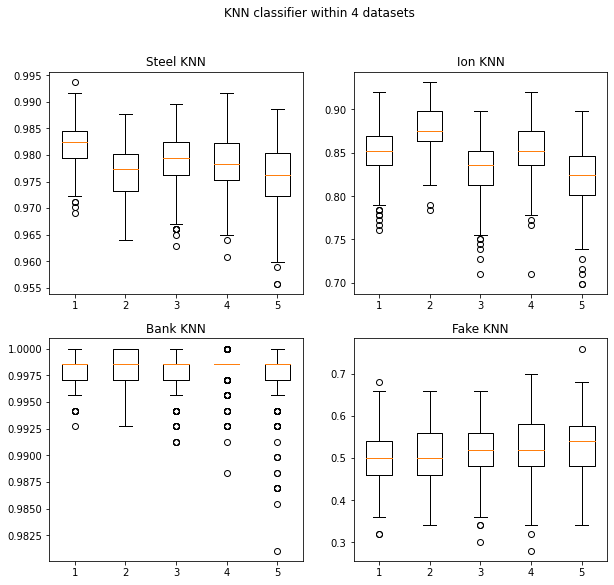

In [170]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('KNN classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_KNN)
axs[0, 0].set_title('Steel KNN')
axs[0, 1].boxplot(ION_KNN)
axs[0, 1].set_title('Ion KNN')
axs[1, 0].boxplot(BANK_KNN)
axs[1, 0].set_title('Bank KNN')
axs[1, 1].boxplot(FAKE_KNN)
axs[1, 1].set_title('Fake KNN')

plt.show()

# 2nd classifier (Gaussian) on 4 datasets

In [172]:
#Second classifier Gaussian NB
from sklearn.naive_bayes import GaussianNB

#Empty list for boxplot
boxlist_GAUSS1 = []
boxlist_GAUSS2 = []
boxlist_GAUSS3 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        gauss1 = GaussianNB(var_smoothing = 1e-9).fit(X_train,y_train)
        gaussscore1 = gauss1.score(X_test, y_test)
        boxlist_GAUSS1.append(gaussscore1)
        print("Split No.{} appended {} to gauss1!".format(j, gaussscore1))
        
        gauss2 = GaussianNB(var_smoothing = 1e-5).fit(X_train,y_train)
        gaussscore2 = gauss2.score(X_test, y_test)
        boxlist_GAUSS2.append(gaussscore2)
        print("Split No.{} appended {} to gauss2!".format(j, gaussscore2))
    
        gauss3 = GaussianNB(var_smoothing = 1e-1).fit(X_train,y_train)
        gaussscore3 = gauss3.score(X_test, y_test)
        boxlist_GAUSS3.append(gaussscore3)
        print("Split No.{} appended {} to gauss3!".format(j, gaussscore3))
    
    count+=1
        
        

i'm on dataset 1!

Split No.0 appended 0.6570545829042225 to gauss1!
Split No.0 appended 0.6570545829042225 to gauss2!
Split No.0 appended 0.9927909371781668 to gauss3!
i'm on dataset 1!

Split No.1 appended 0.666323377960865 to gauss1!
Split No.1 appended 0.666323377960865 to gauss2!
Split No.1 appended 0.9824922760041195 to gauss3!
i'm on dataset 1!

Split No.2 appended 0.639546858908342 to gauss1!
Split No.2 appended 0.639546858908342 to gauss2!
Split No.2 appended 0.9927909371781668 to gauss3!
i'm on dataset 1!

Split No.3 appended 0.6580844490216272 to gauss1!
Split No.3 appended 0.6580844490216272 to gauss2!
Split No.3 appended 0.9824922760041195 to gauss3!
i'm on dataset 1!

Split No.4 appended 0.6632337796086509 to gauss1!
Split No.4 appended 0.6632337796086509 to gauss2!
Split No.4 appended 0.9948506694129763 to gauss3!
i'm on dataset 1!

Split No.5 appended 0.6446961894953656 to gauss1!
Split No.5 appended 0.6446961894953656 to gauss2!
Split No.5 appended 0.98043254376931 to 

# Validation error Gaussian DB

In [173]:
steel_gauss1 = boxlist_GAUSS1[0:250]
steel_gauss2 = boxlist_GAUSS2[0:250]
steel_gauss3 = boxlist_GAUSS3[0:250]


ion_gauss1 = boxlist_GAUSS1[250:500]
ion_gauss2 = boxlist_GAUSS2[250:500]
ion_gauss3 = boxlist_GAUSS3[250:500]


bank_gauss1 = boxlist_GAUSS1[500:750]
bank_gauss2 = boxlist_GAUSS2[500:750]
bank_gauss3 = boxlist_GAUSS3[500:750]


fake_gauss1 = boxlist_GAUSS1[750:1000]
fake_gauss2 = boxlist_GAUSS2[750:1000]
fake_gauss3 = boxlist_GAUSS3[750:1000]

In [174]:
print(1-np.mean(steel_gauss1))
print(1-np.mean(steel_gauss2))
print(1-np.mean(steel_gauss3))

VAL_GAUSS_STEEL = min(1-np.mean(steel_gauss1),1-np.mean(steel_gauss2),1-np.mean(steel_gauss3))  
print(VAL_GAUSS_STEEL)

0.3466076210092688
0.3346199794026776
0.011439752832131722
0.011439752832131722


In [175]:
print(1-np.mean(ion_gauss1))
print(1-np.mean(ion_gauss2))
print(1-np.mean(ion_gauss3))

VAL_GAUSS_ION = min(1-np.mean(ion_gauss1),1-np.mean(ion_gauss2),1-np.mean(ion_gauss3))  
print(VAL_GAUSS_ION)

0.64375
0.5473863636363636
0.14409090909090905
0.14409090909090905


In [176]:
print(1-np.mean(bank_gauss1))
print(1-np.mean(bank_gauss2))
print(1-np.mean(bank_gauss3))

VAL_GAUSS_BANK = min(1-np.mean(bank_gauss1),1-np.mean(bank_gauss2),1-np.mean(bank_gauss3))  
print(VAL_GAUSS_BANK)

0.15841982507288632
0.15841982507288632
0.16047230320699712
0.15841982507288632


In [177]:
print(1-np.mean(fake_gauss1))
print(1-np.mean(fake_gauss2))
print(1-np.mean(fake_gauss3))

VAL_GAUSS_FAKE = min(1-np.mean(fake_gauss1),1-np.mean(fake_gauss2),1-np.mean(fake_gauss3))  
print(VAL_GAUSS_FAKE)

0.38639999999999997
0.38639999999999997
0.38936000000000004
0.38639999999999997


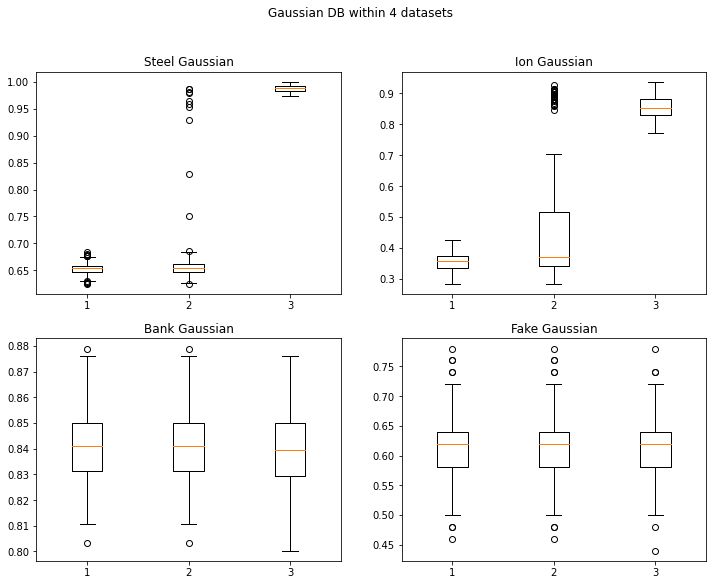

In [178]:
#Code for boxplots.
boxlist_GAUSS1 = pd.DataFrame(boxlist_GAUSS1)
boxlist_GAUSS2 = pd.DataFrame(boxlist_GAUSS2)
boxlist_GAUSS3 = pd.DataFrame(boxlist_GAUSS3)

steel_gauss1 = boxlist_GAUSS1[0:250]
steel_gauss2 = boxlist_GAUSS2[0:250]
steel_gauss3 = boxlist_GAUSS3[0:250]


ion_gauss1 = boxlist_GAUSS1[250:500]
ion_gauss2 = boxlist_GAUSS2[250:500]
ion_gauss3 = boxlist_GAUSS3[250:500]


bank_gauss1 = boxlist_GAUSS1[500:750]
bank_gauss2 = boxlist_GAUSS2[500:750]
bank_gauss3 = boxlist_GAUSS3[500:750]


fake_gauss1 = boxlist_GAUSS1[750:1000]
fake_gauss2 = boxlist_GAUSS2[750:1000]
fake_gauss3 = boxlist_GAUSS3[750:1000]


data1 = [steel_gauss1, steel_gauss2, steel_gauss3]
data2 = [ion_gauss1, ion_gauss2, ion_gauss3]
data3 = [bank_gauss1, bank_gauss2, bank_gauss3]
data4 = [fake_gauss1,fake_gauss2,fake_gauss3]

gauss_headers = ["1e-9", "1e-5", "1e-1"]

STEEL_GAUSS = pd.concat(data1, axis=1, keys=gauss_headers)
ION_GAUSS = pd.concat(data2, axis=1, keys=gauss_headers)
BANK_GAUSS = pd.concat(data3, axis=1, keys=gauss_headers)
FAKE_GAUSS = pd.concat(data4, axis=1, keys=gauss_headers)

#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('Gaussian DB within 4 datasets')
axs[0, 0].boxplot(STEEL_GAUSS)
axs[0, 0].set_title('Steel Gaussian')
axs[0, 1].boxplot(ION_GAUSS)
axs[0, 1].set_title('Ion Gaussian')
axs[1, 0].boxplot(BANK_GAUSS)
axs[1, 0].set_title('Bank Gaussian')
axs[1, 1].boxplot(FAKE_GAUSS)
axs[1, 1].set_title('Fake Gaussian')

plt.show()

# 3rd classifier (Logistic Regression) on 4 datasets

In [180]:
#Second classifier Gaussian NB
from sklearn.linear_model import LogisticRegression

#Empty list for boxplot
boxlist_LOG1 = []
boxlist_LOG2 = []
boxlist_LOG3 = []
boxlist_LOG4 = []
boxlist_LOG5 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        log1 = LogisticRegression(C = 0.1).fit(X_train,y_train)
        logscore1 = log1.score(X_test, y_test)
        boxlist_LOG1.append(logscore1)
        print("Split No.{} appended {} to log1!".format(j, logscore1))
        
        log2 = LogisticRegression(C = 0.5).fit(X_train,y_train)
        logscore2 = log2.score(X_test, y_test)
        boxlist_LOG2.append(logscore2)
        print("Split No.{} appended {} to log2!".format(j, logscore2))
        
        log3 = LogisticRegression(C = 1).fit(X_train,y_train)
        logscore3 = log3.score(X_test, y_test)
        boxlist_LOG3.append(logscore3)
        print("Split No.{} appended {} to log3!".format(j, logscore3))
        
        log4 = LogisticRegression(C = 2).fit(X_train,y_train)
        logscore4 = log4.score(X_test, y_test)
        boxlist_LOG4.append(logscore4)
        print("Split No.{} appended {} to log4!".format(j, logscore4))
        
        log5 = LogisticRegression(C = 5).fit(X_train,y_train)
        logscore5 = log5.score(X_test, y_test)
        boxlist_LOG5.append(logscore1)
        print("Split No.{} appended {} to log5!".format(j, logscore5))

    
    count+=1
        
        

i'm on dataset 1!

Split No.0 appended 0.9989701338825953 to log1!
Split No.0 appended 1.0 to log2!
Split No.0 appended 1.0 to log3!
Split No.0 appended 1.0 to log4!
Split No.0 appended 1.0 to log5!
i'm on dataset 1!

Split No.1 appended 0.9989701338825953 to log1!
Split No.1 appended 1.0 to log2!
Split No.1 appended 1.0 to log3!
Split No.1 appended 1.0 to log4!
Split No.1 appended 1.0 to log5!
i'm on dataset 1!

Split No.2 appended 0.9989701338825953 to log1!
Split No.2 appended 0.9989701338825953 to log2!
Split No.2 appended 0.9989701338825953 to log3!
Split No.2 appended 0.9989701338825953 to log4!
Split No.2 appended 0.9989701338825953 to log5!
i'm on dataset 1!

Split No.3 appended 0.9979402677651905 to log1!
Split No.3 appended 0.9989701338825953 to log2!
Split No.3 appended 0.9989701338825953 to log3!
Split No.3 appended 0.9989701338825953 to log4!
Split No.3 appended 0.9989701338825953 to log5!
i'm on dataset 1!

Split No.4 appended 0.9989701338825953 to log1!
Split No.4 append

# Validation errors logistic regression

In [181]:
steel_log1 = boxlist_LOG1[0:250]
steel_log2 = boxlist_LOG2[0:250]
steel_log3 = boxlist_LOG3[0:250]
steel_log4 = boxlist_LOG4[0:250]
steel_log5 = boxlist_LOG5[0:250]

ion_log1 = boxlist_LOG1[250:500]
ion_log2 = boxlist_LOG2[250:500]
ion_log3 = boxlist_LOG3[250:500]
ion_log4 = boxlist_LOG4[250:500]
ion_log5 = boxlist_LOG5[250:500]

bank_log1 = boxlist_LOG1[500:750]
bank_log2 = boxlist_LOG2[500:750]
bank_log3 = boxlist_LOG3[500:750]
bank_log4 = boxlist_LOG4[500:750]
bank_log5 = boxlist_LOG5[500:750]

fake_log1 = boxlist_LOG1[750:1000]
fake_log2 = boxlist_LOG2[750:1000]
fake_log3 = boxlist_LOG3[750:1000]
fake_log4 = boxlist_LOG4[750:1000]
fake_log5 = boxlist_LOG5[750:1000]

In [182]:
print(1-np.mean(steel_log1))
print(1-np.mean(steel_log2))
print(1-np.mean(steel_log3))
print(1-np.mean(steel_log4))
print(1-np.mean(steel_log5))

VAL_LOG_STEEL = min(1-np.mean(steel_log1),1-np.mean(steel_log2),1-np.mean(steel_log3),1-np.mean(steel_log4),1-np.mean(steel_log5))  
print(VAL_LOG_STEEL)

0.0010175077239957808
0.000605561277033817
0.0005066941297632299
0.0004654994850669114
0.0010175077239957808
0.0004654994850669114


In [183]:
print(1-np.mean(ion_log1))
print(1-np.mean(ion_log2))
print(1-np.mean(ion_log3))
print(1-np.mean(ion_log4))
print(1-np.mean(ion_log5))

VAL_LOG_ION = min(1-np.mean(ion_log1),1-np.mean(ion_log2),1-np.mean(ion_log3),1-np.mean(ion_log4),1-np.mean(ion_log5))  
print(VAL_LOG_ION)

0.13043181818181815
0.13295454545454555
0.13475000000000004
0.13736363636363635
0.13043181818181815
0.13043181818181815


In [184]:
print(1-np.mean(bank_log1))
print(1-np.mean(bank_log2))
print(1-np.mean(bank_log3))
print(1-np.mean(bank_log4))
print(1-np.mean(bank_log5))

VAL_LOG_BANK = min(1-np.mean(bank_log1),1-np.mean(bank_log2),1-np.mean(bank_log3),1-np.mean(bank_log4),1-np.mean(bank_log5))  
print(VAL_LOG_BANK)

0.02779591836734685
0.02085131195335277
0.0189795918367347
0.01755685131195328
0.02779591836734685
0.01755685131195328


In [185]:
print(1-np.mean(fake_log1))
print(1-np.mean(fake_log2))
print(1-np.mean(fake_log3))
print(1-np.mean(fake_log4))
print(1-np.mean(fake_log5))

VAL_LOG_FAKE = min(1-np.mean(fake_log1),1-np.mean(fake_log2),1-np.mean(fake_log3),1-np.mean(fake_log4),1-np.mean(fake_log5))  
print(VAL_LOG_FAKE)

0.38672000000000006
0.37184000000000006
0.36744
0.36376
0.38672000000000006
0.36376


In [186]:
#Code for boxplots.
boxlist_LOG1 = pd.DataFrame(boxlist_LOG1)
boxlist_LOG2 = pd.DataFrame(boxlist_LOG2)
boxlist_LOG3 = pd.DataFrame(boxlist_LOG3)
boxlist_LOG4 = pd.DataFrame(boxlist_LOG4)
boxlist_LOG5 = pd.DataFrame(boxlist_LOG5)

steel_log1 = boxlist_LOG1[0:250]
steel_log2 = boxlist_LOG2[0:250]
steel_log3 = boxlist_LOG3[0:250]
steel_log4 = boxlist_LOG4[0:250]
steel_log5 = boxlist_LOG5[0:250]

ion_log1 = boxlist_LOG1[250:500]
ion_log2 = boxlist_LOG2[250:500]
ion_log3 = boxlist_LOG3[250:500]
ion_log4 = boxlist_LOG4[250:500]
ion_log5 = boxlist_LOG5[250:500]

bank_log1 = boxlist_LOG1[500:750]
bank_log2 = boxlist_LOG2[500:750]
bank_log3 = boxlist_LOG3[500:750]
bank_log4 = boxlist_LOG4[500:750]
bank_log5 = boxlist_LOG5[500:750]

fake_log1 = boxlist_LOG1[750:1000]
fake_log2 = boxlist_LOG2[750:1000]
fake_log3 = boxlist_LOG3[750:1000]
fake_log4 = boxlist_LOG4[750:1000]
fake_log5 = boxlist_LOG5[750:1000]


data1 = [steel_log1, steel_log2, steel_log3, steel_log4, steel_log5]
data2 = [ion_log1, ion_log2, ion_log3,ion_log4,ion_log5]
data3 = [bank_log1, bank_log2, bank_log3, bank_log4, bank_log5]
data4 = [fake_log1,fake_log2,fake_log3,fake_log4,fake_log5]

log_headers = ["0.1", "0.5", "1", "2", "5"]

STEEL_LOG = pd.concat(data1, axis=1, keys=log_headers)
ION_LOG = pd.concat(data2, axis=1, keys=log_headers)
BANK_LOG = pd.concat(data3, axis=1, keys=log_headers)
FAKE_LOG = pd.concat(data4, axis=1, keys=log_headers)

# boxplot logistic regression

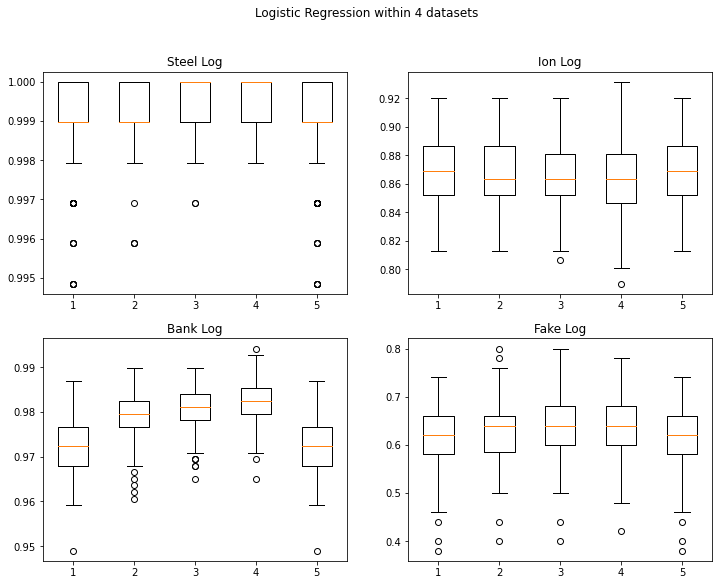

In [187]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('Logistic Regression within 4 datasets')
axs[0, 0].boxplot(STEEL_LOG)
axs[0, 0].set_title('Steel Log')
axs[0, 1].boxplot(ION_LOG)
axs[0, 1].set_title('Ion Log')
axs[1, 0].boxplot(BANK_LOG)
axs[1, 0].set_title('Bank Log')
axs[1, 1].boxplot(FAKE_LOG)
axs[1, 1].set_title('Fake Log')

plt.show()

# 4th classifier (DecisionTreeClassifier) on 4 datasets

In [142]:
#Decision classifier
from sklearn.tree import DecisionTreeClassifier

boxlist_DT1_STEEL = []
boxlist_DT2_STEEL = []
boxlist_DT3_STEEL = []
boxlist_DT4_STEEL = []
boxlist_DT5_STEEL = []
boxlist_DT6_STEEL = []
boxlist_DT7_STEEL = []
boxlist_DT8_STEEL = []
boxlist_DT9_STEEL = []
boxlist_DT10_STEEL = []

boxlist_DT1_ION = []
boxlist_DT2_ION = []
boxlist_DT3_ION = []
boxlist_DT4_ION = []
boxlist_DT5_ION = []
boxlist_DT6_ION = []
boxlist_DT7_ION = []
boxlist_DT8_ION = []
boxlist_DT9_ION = []
boxlist_DT10_ION = []

boxlist_DT1_BANK = []
boxlist_DT2_BANK = []
boxlist_DT3_BANK = []
boxlist_DT4_BANK = []
boxlist_DT5_BANK = []
boxlist_DT6_BANK = []
boxlist_DT7_BANK = []
boxlist_DT8_BANK = []
boxlist_DT9_BANK = []
boxlist_DT10_BANK = []

boxlist_DT1_FAKE = []
boxlist_DT2_FAKE = []
boxlist_DT3_FAKE = []
boxlist_DT4_FAKE = []
boxlist_DT5_FAKE = []
boxlist_DT6_FAKE = []
boxlist_DT7_FAKE = []
boxlist_DT8_FAKE = []
boxlist_DT9_FAKE = []
boxlist_DT10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
                
    print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_STEEL.append(dtscore)
            print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_ION.append(dtscore)
            print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_BANK.append(dtscore)
            print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
        
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()

    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_FAKE.append(dtscore)
            print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
              


Split No.0
I've appended score 0.6570545829042225 at depth 1! to dt1
I've appended score 0.7651905252317199 at depth 2! to dt2
I've appended score 0.8599382080329557 at depth 3! to dt3
I've appended score 0.9423274974253347 at depth 4! to dt4
I've appended score 0.976313079299691 at depth 5! to dt5
I've appended score 1.0 at depth 6! to dt6
I've appended score 1.0 at depth 7! to dt7
I've appended score 1.0 at depth 8! to dt8
I've appended score 1.0 at depth 9! to dt9
I've appended score 1.0 at depth 10! to dt10
Split No.1
I've appended score 0.666323377960865 at depth 1! to dt1
I've appended score 0.7590113285272915 at depth 2! to dt2
I've appended score 0.8558187435633368 at depth 3! to dt3
I've appended score 0.9382080329557158 at depth 4! to dt4
I've appended score 0.9711637487126673 at depth 5! to dt5
I've appended score 1.0 at depth 6! to dt6
I've appended score 1.0 at depth 7! to dt7
I've appended score 1.0 at depth 8! to dt8
I've appended score 1.0 at depth 9! to dt9
I've append

# Validation error Decision Tree Classifier

In [143]:
print(1-np.mean(boxlist_DT1_STEEL))
print(1-np.mean(boxlist_DT2_STEEL))
print(1-np.mean(boxlist_DT3_STEEL))
print(1-np.mean(boxlist_DT4_STEEL))
print(1-np.mean(boxlist_DT5_STEEL))
print(1-np.mean(boxlist_DT6_STEEL))
print(1-np.mean(boxlist_DT7_STEEL))
print(1-np.mean(boxlist_DT8_STEEL))
print(1-np.mean(boxlist_DT9_STEEL))
print(1-np.mean(boxlist_DT10_STEEL))

VAL_DT_STEEL = min(1-np.mean(boxlist_DT1_STEEL),
                    1-np.mean(boxlist_DT2_STEEL),
                    1-np.mean(boxlist_DT3_STEEL),
                    1-np.mean(boxlist_DT4_STEEL),
                    1-np.mean(boxlist_DT5_STEEL),
                    1-np.mean(boxlist_DT6_STEEL),
                    1-np.mean(boxlist_DT7_STEEL),
                    1-np.mean(boxlist_DT8_STEEL),
                    1-np.mean(boxlist_DT9_STEEL),
                    1-np.mean(boxlist_DT10_STEEL))  
print(VAL_DT_STEEL)

0.3466076210092688
0.2444160659114316
0.14804943357363554
0.06542533470648826
0.029787847579814564
0.0
0.0
0.0
0.0
0.0
0.0


In [144]:
print(1-np.mean(boxlist_DT1_ION))
print(1-np.mean(boxlist_DT2_ION))
print(1-np.mean(boxlist_DT3_ION))
print(1-np.mean(boxlist_DT4_ION))
print(1-np.mean(boxlist_DT5_ION))
print(1-np.mean(boxlist_DT6_ION))
print(1-np.mean(boxlist_DT7_ION))
print(1-np.mean(boxlist_DT8_ION))
print(1-np.mean(boxlist_DT9_ION))
print(1-np.mean(boxlist_DT10_ION))

VAL_DT_ION = min(1-np.mean(boxlist_DT1_ION),
                    1-np.mean(boxlist_DT2_ION),
                    1-np.mean(boxlist_DT3_ION),
                    1-np.mean(boxlist_DT4_ION),
                    1-np.mean(boxlist_DT5_ION),
                    1-np.mean(boxlist_DT6_ION),
                    1-np.mean(boxlist_DT7_ION),
                    1-np.mean(boxlist_DT8_ION),
                    1-np.mean(boxlist_DT9_ION),
                    1-np.mean(boxlist_DT10_ION))  
print(VAL_DT_ION)

0.2084772727272728
0.16715909090909098
0.1579090909090909
0.14509090909090905
0.14056818181818176
0.13922727272727276
0.139
0.14027272727272722
0.14190909090909098
0.14129545454545456
0.139


In [145]:
print(1-np.mean(boxlist_DT1_BANK))
print(1-np.mean(boxlist_DT2_BANK))
print(1-np.mean(boxlist_DT3_BANK))
print(1-np.mean(boxlist_DT4_BANK))
print(1-np.mean(boxlist_DT5_BANK))
print(1-np.mean(boxlist_DT6_BANK))
print(1-np.mean(boxlist_DT7_BANK))
print(1-np.mean(boxlist_DT8_BANK))
print(1-np.mean(boxlist_DT9_BANK))
print(1-np.mean(boxlist_DT10_BANK))

VAL_DT_BANK = min(1-np.mean(boxlist_DT1_BANK),
                    1-np.mean(boxlist_DT2_BANK),
                    1-np.mean(boxlist_DT3_BANK),
                    1-np.mean(boxlist_DT4_BANK),
                    1-np.mean(boxlist_DT5_BANK),
                    1-np.mean(boxlist_DT6_BANK),
                    1-np.mean(boxlist_DT7_BANK),
                    1-np.mean(boxlist_DT8_BANK),
                    1-np.mean(boxlist_DT9_BANK),
                    1-np.mean(boxlist_DT10_BANK))  
print(VAL_DT_BANK)

0.15815743440233243
0.10659475218658898
0.07594752186588927
0.052915451895043764
0.03432069970845486
0.028833819241982583
0.027574344023323594
0.02761516034985423
0.02713119533527697
0.027708454810495553
0.02713119533527697


In [146]:
print(1-np.mean(boxlist_DT1_FAKE))
print(1-np.mean(boxlist_DT2_FAKE))
print(1-np.mean(boxlist_DT3_FAKE))
print(1-np.mean(boxlist_DT4_FAKE))
print(1-np.mean(boxlist_DT5_STEEL))
print(1-np.mean(boxlist_DT6_STEEL))
print(1-np.mean(boxlist_DT7_STEEL))
print(1-np.mean(boxlist_DT8_STEEL))
print(1-np.mean(boxlist_DT9_STEEL))
print(1-np.mean(boxlist_DT10_STEEL))

VAL_DT_FAKE = min(1-np.mean(boxlist_DT1_FAKE),
                    1-np.mean(boxlist_DT2_FAKE),
                    1-np.mean(boxlist_DT3_FAKE),
                    1-np.mean(boxlist_DT4_FAKE),
                    1-np.mean(boxlist_DT5_FAKE),
                    1-np.mean(boxlist_DT6_FAKE),
                    1-np.mean(boxlist_DT7_FAKE),
                    1-np.mean(boxlist_DT8_FAKE),
                    1-np.mean(boxlist_DT9_FAKE),
                    1-np.mean(boxlist_DT10_FAKE))  
print(VAL_DT_FAKE)

0.32255999999999996
0.3825599999999999
0.39224000000000003
0.3912
0.029787847579814564
0.0
0.0
0.0
0.0
0.0
0.32255999999999996


In [147]:
#Code for boxplots.
boxlist_DT1_STEEL = pd.DataFrame(boxlist_DT1_STEEL)
boxlist_DT2_STEEL = pd.DataFrame(boxlist_DT2_STEEL)
boxlist_DT3_STEEL = pd.DataFrame(boxlist_DT3_STEEL)
boxlist_DT4_STEEL = pd.DataFrame(boxlist_DT4_STEEL)
boxlist_DT5_STEEL = pd.DataFrame(boxlist_DT5_STEEL)
boxlist_DT6_STEEL = pd.DataFrame(boxlist_DT6_STEEL)
boxlist_DT7_STEEL = pd.DataFrame(boxlist_DT7_STEEL)
boxlist_DT8_STEEL = pd.DataFrame(boxlist_DT8_STEEL)
boxlist_DT9_STEEL = pd.DataFrame(boxlist_DT9_STEEL)
boxlist_DT10_STEEL = pd.DataFrame(boxlist_DT10_STEEL)

boxlist_DT1_ION = pd.DataFrame(boxlist_DT1_ION)
boxlist_DT2_ION = pd.DataFrame(boxlist_DT2_ION)
boxlist_DT3_ION = pd.DataFrame(boxlist_DT3_ION)
boxlist_DT4_ION = pd.DataFrame(boxlist_DT4_ION)
boxlist_DT5_ION = pd.DataFrame(boxlist_DT5_ION)
boxlist_DT6_ION = pd.DataFrame(boxlist_DT6_ION)
boxlist_DT7_ION = pd.DataFrame(boxlist_DT7_ION)
boxlist_DT8_ION = pd.DataFrame(boxlist_DT8_ION)
boxlist_DT9_ION = pd.DataFrame(boxlist_DT9_ION)
boxlist_DT10_ION = pd.DataFrame(boxlist_DT10_ION)

boxlist_DT1_BANK = pd.DataFrame(boxlist_DT1_BANK)
boxlist_DT2_BANK = pd.DataFrame(boxlist_DT2_BANK)
boxlist_DT3_BANK = pd.DataFrame(boxlist_DT3_BANK)
boxlist_DT4_BANK = pd.DataFrame(boxlist_DT4_BANK)
boxlist_DT5_BANK = pd.DataFrame(boxlist_DT5_BANK)
boxlist_DT6_BANK = pd.DataFrame(boxlist_DT6_BANK)
boxlist_DT7_BANK = pd.DataFrame(boxlist_DT7_BANK)
boxlist_DT8_BANK = pd.DataFrame(boxlist_DT8_BANK)
boxlist_DT9_BANK = pd.DataFrame(boxlist_DT9_BANK)
boxlist_DT10_BANK = pd.DataFrame(boxlist_DT10_BANK)

boxlist_DT1_FAKE = pd.DataFrame(boxlist_DT1_FAKE)
boxlist_DT2_FAKE = pd.DataFrame(boxlist_DT2_FAKE)
boxlist_DT3_FAKE = pd.DataFrame(boxlist_DT3_FAKE)
boxlist_DT4_FAKE = pd.DataFrame(boxlist_DT4_FAKE)
boxlist_DT5_FAKE = pd.DataFrame(boxlist_DT5_FAKE)
boxlist_DT6_FAKE = pd.DataFrame(boxlist_DT6_FAKE)
boxlist_DT7_FAKE = pd.DataFrame(boxlist_DT7_FAKE)
boxlist_DT8_FAKE = pd.DataFrame(boxlist_DT8_FAKE)
boxlist_DT9_FAKE = pd.DataFrame(boxlist_DT9_FAKE)
boxlist_DT10_FAKE = pd.DataFrame(boxlist_DT10_FAKE)



data1 = [boxlist_DT1_STEEL,
         boxlist_DT2_STEEL,
         boxlist_DT3_STEEL,
         boxlist_DT4_STEEL,
         boxlist_DT5_STEEL,
         boxlist_DT6_STEEL,
         boxlist_DT7_STEEL,
         boxlist_DT8_STEEL,
         boxlist_DT9_STEEL,
         boxlist_DT10_STEEL]


data2 =[boxlist_DT1_ION,
       boxlist_DT2_ION,
       boxlist_DT3_ION,
       boxlist_DT4_ION,
       boxlist_DT5_ION,
       boxlist_DT6_ION,
       boxlist_DT7_ION,
       boxlist_DT8_ION,
       boxlist_DT9_ION,
       boxlist_DT10_ION,]

data3 =[boxlist_DT1_BANK,
       boxlist_DT2_BANK,
       boxlist_DT3_BANK,
       boxlist_DT4_BANK,
       boxlist_DT5_BANK,
       boxlist_DT6_BANK,
       boxlist_DT7_BANK,
       boxlist_DT8_BANK,
       boxlist_DT9_BANK,
       boxlist_DT10_BANK,]

data4 =[boxlist_DT1_FAKE,
       boxlist_DT2_FAKE,
       boxlist_DT3_FAKE,
       boxlist_DT4_FAKE,
       boxlist_DT5_FAKE,
       boxlist_DT6_FAKE,
       boxlist_DT7_FAKE,
       boxlist_DT8_FAKE,
       boxlist_DT9_FAKE,
       boxlist_DT10_FAKE]

dt_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_DT = pd.concat(data1, axis=1, keys=dt_headers)
ION_DT = pd.concat(data2, axis=1, keys=dt_headers)
BANK_DT = pd.concat(data3, axis=1, keys=dt_headers)
FAKE_DT = pd.concat(data4, axis=1, keys=dt_headers)

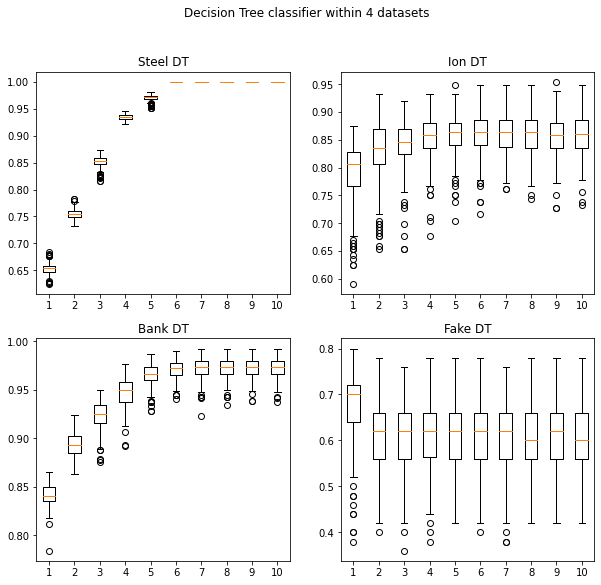

In [148]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Decision Tree classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_DT)
axs[0, 0].set_title('Steel DT')
axs[0, 1].boxplot(ION_DT)
axs[0, 1].set_title('Ion DT')
axs[1, 0].boxplot(BANK_DT)
axs[1, 0].set_title('Bank DT')
axs[1, 1].boxplot(FAKE_DT)
axs[1, 1].set_title('Fake DT')

plt.show()

## 5th classifier (GradientBoostingClassifier) on 4 datasets

In [149]:
#Decision classifier
from sklearn.ensemble import GradientBoostingClassifier

boxlist_GB1_STEEL = []
boxlist_GB2_STEEL = []
boxlist_GB3_STEEL = []
boxlist_GB4_STEEL = []
boxlist_GB5_STEEL = []
boxlist_GB6_STEEL = []
boxlist_GB7_STEEL = []
boxlist_GB8_STEEL = []
boxlist_GB9_STEEL = []
boxlist_GB10_STEEL = []

boxlist_GB1_ION = []
boxlist_GB2_ION = []
boxlist_GB3_ION = []
boxlist_GB4_ION = []
boxlist_GB5_ION = []
boxlist_GB6_ION = []
boxlist_GB7_ION = []
boxlist_GB8_ION = []
boxlist_GB9_ION = []
boxlist_GB10_ION = []

boxlist_GB1_BANK = []
boxlist_GB2_BANK = []
boxlist_GB3_BANK = []
boxlist_GB4_BANK = []
boxlist_GB5_BANK = []
boxlist_GB6_BANK = []
boxlist_GB7_BANK = []
boxlist_GB8_BANK = []
boxlist_GB9_BANK = []
boxlist_GB10_BANK = []

boxlist_GB1_FAKE = []
boxlist_GB2_FAKE = []
boxlist_GB3_FAKE = []
boxlist_GB4_FAKE = []
boxlist_GB5_FAKE = []
boxlist_GB6_FAKE = []
boxlist_GB7_FAKE = []
boxlist_GB8_FAKE = []
boxlist_GB9_FAKE = []
boxlist_GB10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_STEEL.append(gbscore)
            print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_ION.append(gbscore)
            print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))

            #Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_BANK.append(gbscore)
            print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_FAKE.append(gbscore)
            print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))

Split No.0
I've appended score 1.0 at depth 1! to gb1
I've appended score 1.0 at depth 2! to gb2
I've appended score 1.0 at depth 3! to gb3
I've appended score 1.0 at depth 4! to gb4
I've appended score 1.0 at depth 5! to gb5
I've appended score 1.0 at depth 6! to gb6
I've appended score 1.0 at depth 7! to gb7
I've appended score 1.0 at depth 8! to gb8
I've appended score 1.0 at depth 9! to gb9
I've appended score 1.0 at depth 10! to gb10
Split No.1
I've appended score 1.0 at depth 1! to gb1
I've appended score 1.0 at depth 2! to gb2
I've appended score 1.0 at depth 3! to gb3
I've appended score 1.0 at depth 4! to gb4
I've appended score 1.0 at depth 5! to gb5
I've appended score 1.0 at depth 6! to gb6
I've appended score 1.0 at depth 7! to gb7
I've appended score 1.0 at depth 8! to gb8
I've appended score 1.0 at depth 9! to gb9
I've appended score 1.0 at depth 10! to gb10
Split No.2
I've appended score 1.0 at depth 1! to gb1
I've appended score 1.0 at depth 2! to gb2
I've appended sco

# Validation error gradient boosting classifier

In [150]:
print(1-np.mean(boxlist_GB1_STEEL))
print(1-np.mean(boxlist_GB2_STEEL))
print(1-np.mean(boxlist_GB3_STEEL))
print(1-np.mean(boxlist_GB4_STEEL))
print(1-np.mean(boxlist_GB5_STEEL))
print(1-np.mean(boxlist_GB6_STEEL))
print(1-np.mean(boxlist_GB7_STEEL))
print(1-np.mean(boxlist_GB8_STEEL))
print(1-np.mean(boxlist_GB9_STEEL))
print(1-np.mean(boxlist_GB10_STEEL))

VAL_GB_STEEL = min(1-np.mean(boxlist_GB1_STEEL),
                    1-np.mean(boxlist_GB2_STEEL),
                    1-np.mean(boxlist_GB3_STEEL),
                    1-np.mean(boxlist_GB4_STEEL),
                    1-np.mean(boxlist_GB5_STEEL),
                    1-np.mean(boxlist_GB6_STEEL),
                    1-np.mean(boxlist_GB7_STEEL),
                    1-np.mean(boxlist_GB8_STEEL),
                    1-np.mean(boxlist_GB9_STEEL),
                    1-np.mean(boxlist_GB10_STEEL))  
print(VAL_GB_STEEL)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [151]:
print(1-np.mean(boxlist_GB1_ION))
print(1-np.mean(boxlist_GB2_ION))
print(1-np.mean(boxlist_GB3_ION))
print(1-np.mean(boxlist_GB4_ION))
print(1-np.mean(boxlist_GB5_ION))
print(1-np.mean(boxlist_GB6_ION))
print(1-np.mean(boxlist_GB7_ION))
print(1-np.mean(boxlist_GB8_ION))
print(1-np.mean(boxlist_GB9_ION))
print(1-np.mean(boxlist_GB10_ION))

VAL_GB_ION = min(1-np.mean(boxlist_GB1_ION),
                    1-np.mean(boxlist_GB2_ION),
                    1-np.mean(boxlist_GB3_ION),
                    1-np.mean(boxlist_GB4_ION),
                    1-np.mean(boxlist_GB5_ION),
                    1-np.mean(boxlist_GB6_ION),
                    1-np.mean(boxlist_GB7_ION),
                    1-np.mean(boxlist_GB8_ION),
                    1-np.mean(boxlist_GB9_ION),
                    1-np.mean(boxlist_GB10_ION))  
print(VAL_GB_ION)

0.11099999999999999
0.1023409090909091
0.10227272727272729
0.10836363636363633
0.13731818181818178
0.14484090909090896
0.14477272727272728
0.14034090909090902
0.13770454545454536
0.13631818181818178
0.10227272727272729


In [152]:
print(1-np.mean(boxlist_GB1_BANK))
print(1-np.mean(boxlist_GB2_BANK))
print(1-np.mean(boxlist_GB3_BANK))
print(1-np.mean(boxlist_GB4_BANK))
print(1-np.mean(boxlist_GB5_BANK))
print(1-np.mean(boxlist_GB6_BANK))
print(1-np.mean(boxlist_GB7_BANK))
print(1-np.mean(boxlist_GB8_BANK))
print(1-np.mean(boxlist_GB9_BANK))
print(1-np.mean(boxlist_GB10_BANK))

VAL_GB_BANK = min(1-np.mean(boxlist_GB1_BANK),
                    1-np.mean(boxlist_GB2_BANK),
                    1-np.mean(boxlist_GB3_BANK),
                    1-np.mean(boxlist_GB4_BANK),
                    1-np.mean(boxlist_GB5_BANK),
                    1-np.mean(boxlist_GB6_BANK),
                    1-np.mean(boxlist_GB7_BANK),
                    1-np.mean(boxlist_GB8_BANK),
                    1-np.mean(boxlist_GB9_BANK),
                    1-np.mean(boxlist_GB10_BANK))  
print(VAL_GB_BANK)

0.04185422740524769
0.01745772594752182
0.01381924198250728
0.014431486880466471
0.02226239067055391
0.025650145772594724
0.026419825072886316
0.02712536443148683
0.026851311953352774
0.026827988338192443
0.01381924198250728


In [153]:
print(1-np.mean(boxlist_GB1_FAKE))
print(1-np.mean(boxlist_GB2_FAKE))
print(1-np.mean(boxlist_GB3_FAKE))
print(1-np.mean(boxlist_GB4_FAKE))
print(1-np.mean(boxlist_GB5_FAKE))
print(1-np.mean(boxlist_GB6_FAKE))
print(1-np.mean(boxlist_GB7_FAKE))
print(1-np.mean(boxlist_GB8_FAKE))
print(1-np.mean(boxlist_GB9_FAKE))
print(1-np.mean(boxlist_GB10_FAKE))

VAL_GB_FAKE = min(1-np.mean(boxlist_GB1_FAKE),
                    1-np.mean(boxlist_GB2_FAKE),
                    1-np.mean(boxlist_GB3_FAKE),
                    1-np.mean(boxlist_GB4_FAKE),
                    1-np.mean(boxlist_GB5_FAKE),
                    1-np.mean(boxlist_GB6_FAKE),
                    1-np.mean(boxlist_GB7_FAKE),
                    1-np.mean(boxlist_GB8_FAKE),
                    1-np.mean(boxlist_GB9_FAKE),
                    1-np.mean(boxlist_GB10_FAKE))  
print(VAL_GB_FAKE)

0.37824
0.38280000000000003
0.382
0.39160000000000006
0.38976
0.38448000000000004
0.3872000000000001
0.38839999999999997
0.3864000000000001
0.38664
0.37824


# BOXPLOT for GRADIENT BOOSTING CLASSIFIER

In [154]:
#Code for boxplots.
boxlist_GB1_STEEL = pd.DataFrame(boxlist_GB1_STEEL)
boxlist_GB2_STEEL = pd.DataFrame(boxlist_GB2_STEEL)
boxlist_GB3_STEEL = pd.DataFrame(boxlist_GB3_STEEL)
boxlist_GB4_STEEL = pd.DataFrame(boxlist_GB4_STEEL)
boxlist_GB5_STEEL = pd.DataFrame(boxlist_GB5_STEEL)
boxlist_GB6_STEEL = pd.DataFrame(boxlist_GB6_STEEL)
boxlist_GB7_STEEL = pd.DataFrame(boxlist_GB7_STEEL)
boxlist_GB8_STEEL = pd.DataFrame(boxlist_GB8_STEEL)
boxlist_GB9_STEEL = pd.DataFrame(boxlist_GB9_STEEL)
boxlist_GB10_STEEL = pd.DataFrame(boxlist_GB10_STEEL)

boxlist_GB1_ION = pd.DataFrame(boxlist_GB1_ION)
boxlist_GB2_ION = pd.DataFrame(boxlist_GB2_ION)
boxlist_GB3_ION = pd.DataFrame(boxlist_GB3_ION)
boxlist_GB4_ION = pd.DataFrame(boxlist_GB4_ION)
boxlist_GB5_ION = pd.DataFrame(boxlist_GB5_ION)
boxlist_GB6_ION = pd.DataFrame(boxlist_GB6_ION)
boxlist_GB7_ION = pd.DataFrame(boxlist_GB7_ION)
boxlist_GB8_ION = pd.DataFrame(boxlist_GB8_ION)
boxlist_GB9_ION = pd.DataFrame(boxlist_GB9_ION)
boxlist_GB10_ION = pd.DataFrame(boxlist_GB10_ION)

boxlist_GB1_BANK = pd.DataFrame(boxlist_GB1_BANK)
boxlist_GB2_BANK = pd.DataFrame(boxlist_GB2_BANK)
boxlist_GB3_BANK = pd.DataFrame(boxlist_GB3_BANK)
boxlist_GB4_BANK = pd.DataFrame(boxlist_GB4_BANK)
boxlist_GB5_BANK = pd.DataFrame(boxlist_GB5_BANK)
boxlist_GB6_BANK = pd.DataFrame(boxlist_GB6_BANK)
boxlist_GB7_BANK = pd.DataFrame(boxlist_GB7_BANK)
boxlist_GB8_BANK = pd.DataFrame(boxlist_GB8_BANK)
boxlist_GB9_BANK = pd.DataFrame(boxlist_GB9_BANK)
boxlist_GB10_BANK = pd.DataFrame(boxlist_GB10_BANK)

boxlist_GB1_FAKE = pd.DataFrame(boxlist_GB1_FAKE)
boxlist_GB2_FAKE = pd.DataFrame(boxlist_GB2_FAKE)
boxlist_GB3_FAKE = pd.DataFrame(boxlist_GB3_FAKE)
boxlist_GB4_FAKE = pd.DataFrame(boxlist_GB4_FAKE)
boxlist_GB5_FAKE = pd.DataFrame(boxlist_GB5_FAKE)
boxlist_GB6_FAKE = pd.DataFrame(boxlist_GB6_FAKE)
boxlist_GB7_FAKE = pd.DataFrame(boxlist_GB7_FAKE)
boxlist_GB8_FAKE = pd.DataFrame(boxlist_GB8_FAKE)
boxlist_GB9_FAKE = pd.DataFrame(boxlist_GB9_FAKE)
boxlist_GB10_FAKE = pd.DataFrame(boxlist_GB10_FAKE)



data1 = [boxlist_GB1_STEEL,
         boxlist_GB2_STEEL,
         boxlist_GB3_STEEL,
         boxlist_GB4_STEEL,
         boxlist_GB5_STEEL,
         boxlist_GB6_STEEL,
         boxlist_GB7_STEEL,
         boxlist_GB8_STEEL,
         boxlist_GB9_STEEL,
         boxlist_GB10_STEEL]


data2 =[boxlist_GB1_ION,
       boxlist_GB2_ION,
       boxlist_GB3_ION,
       boxlist_GB4_ION,
       boxlist_GB5_ION,
       boxlist_GB6_ION,
       boxlist_GB7_ION,
       boxlist_GB8_ION,
       boxlist_GB9_ION,
       boxlist_GB10_ION,]

data3 =[boxlist_GB1_BANK,
       boxlist_GB2_BANK,
       boxlist_GB3_BANK,
       boxlist_GB4_BANK,
       boxlist_GB5_BANK,
       boxlist_GB6_BANK,
       boxlist_GB7_BANK,
       boxlist_GB8_BANK,
       boxlist_GB9_BANK,
       boxlist_GB10_BANK,]

data4 =[boxlist_GB1_FAKE,
       boxlist_GB2_FAKE,
       boxlist_GB3_FAKE,
       boxlist_GB4_FAKE,
       boxlist_GB5_FAKE,
       boxlist_GB6_FAKE,
       boxlist_GB7_FAKE,
       boxlist_GB8_FAKE,
       boxlist_GB9_FAKE,
       boxlist_GB10_FAKE]

gb_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_GB = pd.concat(data1, axis=1, keys=gb_headers)
ION_GB = pd.concat(data2, axis=1, keys=gb_headers)
BANK_GB = pd.concat(data3, axis=1, keys=gb_headers)
FAKE_GB = pd.concat(data4, axis=1, keys=gb_headers)

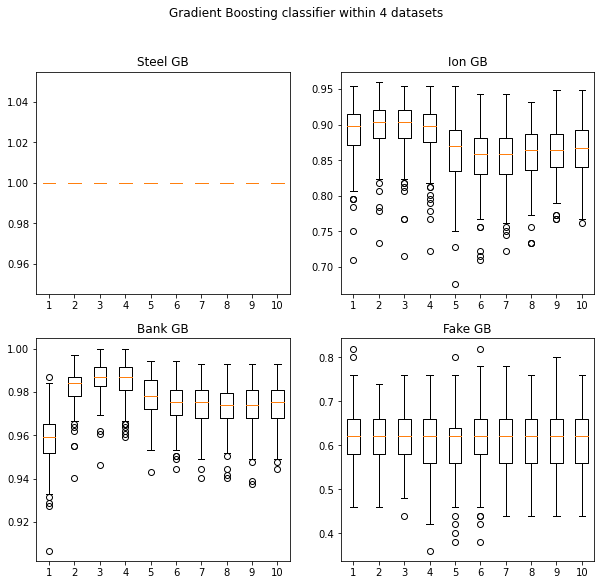

In [155]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Gradient Boosting classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_GB)
axs[0, 0].set_title('Steel GB')
axs[0, 1].boxplot(ION_GB)
axs[0, 1].set_title('Ion GB')
axs[1, 0].boxplot(BANK_GB)
axs[1, 0].set_title('Bank GB')
axs[1, 1].boxplot(FAKE_GB)
axs[1, 1].set_title('Fake GB')

plt.show()

## 6th classifier (RandomForestClassifier) on 4 datasets

In [156]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

boxlist_RF1_STEEL = []
boxlist_RF2_STEEL =[]
boxlist_RF3_STEEL =[]
boxlist_RF4_STEEL =[]
boxlist_RF5_STEEL =[]
boxlist_RF6_STEEL =[]
boxlist_RF7_STEEL =[]
boxlist_RF8_STEEL =[]
boxlist_RF9_STEEL =[]
boxlist_RF10_STEEL =[]

boxlist_RF1_ION = []
boxlist_RF2_ION = []
boxlist_RF3_ION = []
boxlist_RF4_ION = []
boxlist_RF5_ION = []
boxlist_RF6_ION = []
boxlist_RF7_ION = []
boxlist_RF8_ION = []
boxlist_RF9_ION = []
boxlist_RF10_ION = []

boxlist_RF1_BANK = []
boxlist_RF2_BANK = []
boxlist_RF3_BANK = []
boxlist_RF4_BANK = []
boxlist_RF5_BANK = []
boxlist_RF6_BANK = []
boxlist_RF7_BANK = []
boxlist_RF8_BANK = []
boxlist_RF9_BANK = []
boxlist_RF10_BANK = []


boxlist_RF1_FAKE = []
boxlist_RF2_FAKE = []
boxlist_RF3_FAKE = []
boxlist_RF4_FAKE = []
boxlist_RF5_FAKE = []
boxlist_RF6_FAKE = []
boxlist_RF7_FAKE = []
boxlist_RF8_FAKE = []
boxlist_RF9_FAKE = []
boxlist_RF10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_STEEL.append(rfscore)
            print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))

            #Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_ION.append(rfscore)
            print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_BANK.append(rfscore)
            print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_FAKE.append(rfscore)
            print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            

Split No.0
I've appended score 0.6570545829042225 at depth 1! to dt1
I've appended score 0.7559217301750772 at depth 2! to dt2
I've appended score 0.84346035015448 at depth 3! to dt3
I've appended score 0.9237899073120495 at depth 4! to dt4
I've appended score 0.9701338825952626 at depth 5! to dt5
I've appended score 0.9742533470648815 at depth 6! to dt6
I've appended score 0.9855818743563337 at depth 7! to dt7
I've appended score 0.984552008238929 at depth 8! to dt8
I've appended score 0.9876416065911432 at depth 9! to dt9
I've appended score 0.9866117404737385 at depth 10! to dt10
Split No.1
I've appended score 0.666323377960865 at depth 1! to dt1
I've appended score 0.717816683831102 at depth 2! to dt2
I've appended score 0.8619979402677652 at depth 3! to dt3
I've appended score 0.8774459320288363 at depth 4! to dt4
I've appended score 0.9237899073120495 at depth 5! to dt5
I've appended score 0.9546858908341915 at depth 6! to dt6
I've appended score 0.9577754891864058 at depth 7! to

# Validation Errors Random Forest 

In [157]:
print(1-np.mean(boxlist_RF1_STEEL))
print(1-np.mean(boxlist_RF2_STEEL))
print(1-np.mean(boxlist_RF3_STEEL))
print(1-np.mean(boxlist_RF4_STEEL))
print(1-np.mean(boxlist_RF5_STEEL))
print(1-np.mean(boxlist_RF6_STEEL))
print(1-np.mean(boxlist_RF7_STEEL))
print(1-np.mean(boxlist_RF8_STEEL))
print(1-np.mean(boxlist_RF9_STEEL))
print(1-np.mean(boxlist_RF10_STEEL))

VAL_RF_STEEL = min(1-np.mean(boxlist_RF1_STEEL),
                    1-np.mean(boxlist_RF2_STEEL),
                    1-np.mean(boxlist_RF3_STEEL),
                    1-np.mean(boxlist_RF4_STEEL),
                    1-np.mean(boxlist_RF5_STEEL),
                    1-np.mean(boxlist_RF6_STEEL),
                    1-np.mean(boxlist_RF7_STEEL),
                    1-np.mean(boxlist_RF8_STEEL),
                    1-np.mean(boxlist_RF9_STEEL),
                    1-np.mean(boxlist_RF10_STEEL))  
print(VAL_RF_STEEL)

0.3463975283213182
0.28205561277033986
0.1868465499485067
0.12804531410916575
0.09178578784757974
0.0672131822863028
0.04924819773429456
0.04070030895983523
0.033165808444902134
0.027118434603501607
0.027118434603501607


In [158]:
print(1-np.mean(boxlist_RF1_ION))
print(1-np.mean(boxlist_RF2_ION))
print(1-np.mean(boxlist_RF3_ION))
print(1-np.mean(boxlist_RF4_ION))
print(1-np.mean(boxlist_RF5_ION))
print(1-np.mean(boxlist_RF6_ION))
print(1-np.mean(boxlist_RF7_ION))
print(1-np.mean(boxlist_RF8_ION))
print(1-np.mean(boxlist_RF9_ION))
print(1-np.mean(boxlist_RF10_ION))

VAL_RF_ION = min(1-np.mean(boxlist_RF1_ION),
                    1-np.mean(boxlist_RF2_ION),
                    1-np.mean(boxlist_RF3_ION),
                    1-np.mean(boxlist_RF4_ION),
                    1-np.mean(boxlist_RF5_ION),
                    1-np.mean(boxlist_RF6_ION),
                    1-np.mean(boxlist_RF7_ION),
                    1-np.mean(boxlist_RF8_ION),
                    1-np.mean(boxlist_RF9_ION),
                    1-np.mean(boxlist_RF10_ION))  
print(VAL_RF_ION)

0.19820454545454536
0.13002272727272723
0.10268181818181821
0.089409090909091
0.08393181818181827
0.08086363636363636
0.08027272727272727
0.07972727272727276
0.0788863636363637
0.07859090909090904
0.07859090909090904


In [159]:
print(1-np.mean(boxlist_RF1_BANK))
print(1-np.mean(boxlist_RF2_BANK))
print(1-np.mean(boxlist_RF3_BANK))
print(1-np.mean(boxlist_RF4_BANK))
print(1-np.mean(boxlist_RF5_BANK))
print(1-np.mean(boxlist_RF6_BANK))
print(1-np.mean(boxlist_RF7_BANK))
print(1-np.mean(boxlist_RF8_BANK))
print(1-np.mean(boxlist_RF9_BANK))
print(1-np.mean(boxlist_RF10_BANK))

VAL_RF_BANK = min(1-np.mean(boxlist_RF1_BANK),
                    1-np.mean(boxlist_RF2_BANK),
                    1-np.mean(boxlist_RF3_BANK),
                    1-np.mean(boxlist_RF4_BANK),
                    1-np.mean(boxlist_RF5_BANK),
                    1-np.mean(boxlist_RF6_BANK),
                    1-np.mean(boxlist_RF7_BANK),
                    1-np.mean(boxlist_RF8_BANK),
                    1-np.mean(boxlist_RF9_BANK),
                    1-np.mean(boxlist_RF10_BANK))  
print(VAL_RF_BANK)

0.12949271137026241
0.07679883381924202
0.04982507288629745
0.03394752186588923
0.02156851311953345
0.0158425655976675
0.013807580174927114
0.013195335276967923
0.012973760932944667
0.013061224489795853
0.012973760932944667


In [160]:
print(1-np.mean(boxlist_RF1_FAKE))
print(1-np.mean(boxlist_RF2_FAKE))
print(1-np.mean(boxlist_RF3_FAKE))
print(1-np.mean(boxlist_RF4_FAKE))
print(1-np.mean(boxlist_RF5_FAKE))
print(1-np.mean(boxlist_RF6_FAKE))
print(1-np.mean(boxlist_RF7_FAKE))
print(1-np.mean(boxlist_RF8_FAKE))
print(1-np.mean(boxlist_RF9_FAKE))
print(1-np.mean(boxlist_RF10_FAKE))

VAL_RF_FAKE = min(1-np.mean(boxlist_RF1_FAKE),
                    1-np.mean(boxlist_RF2_FAKE),
                    1-np.mean(boxlist_RF3_FAKE),
                    1-np.mean(boxlist_RF4_FAKE),
                    1-np.mean(boxlist_RF5_FAKE),
                    1-np.mean(boxlist_RF6_FAKE),
                    1-np.mean(boxlist_RF7_FAKE),
                    1-np.mean(boxlist_RF8_FAKE),
                    1-np.mean(boxlist_RF9_FAKE),
                    1-np.mean(boxlist_RF10_FAKE))  
print(VAL_RF_FAKE)

0.4280799999999999
0.40824000000000005
0.39783999999999997
0.40127999999999997
0.3992
0.39776
0.39535999999999993
0.39903999999999995
0.39327999999999996
0.3952800000000001
0.39327999999999996


# Boxplot of Random Forest Classifier

In [161]:
#Code for boxplots.
boxlist_RF1_STEEL = pd.DataFrame(boxlist_RF1_STEEL)
boxlist_RF2_STEEL = pd.DataFrame(boxlist_RF2_STEEL)
boxlist_RF3_STEEL = pd.DataFrame(boxlist_RF3_STEEL)
boxlist_RF4_STEEL = pd.DataFrame(boxlist_RF4_STEEL)
boxlist_RF5_STEEL = pd.DataFrame(boxlist_RF5_STEEL)
boxlist_RF6_STEEL = pd.DataFrame(boxlist_RF6_STEEL)
boxlist_RF7_STEEL = pd.DataFrame(boxlist_RF7_STEEL)
boxlist_RF8_STEEL = pd.DataFrame(boxlist_RF8_STEEL)
boxlist_RF9_STEEL = pd.DataFrame(boxlist_RF9_STEEL)
boxlist_RF10_STEEL = pd.DataFrame(boxlist_RF10_STEEL)

boxlist_RF1_ION = pd.DataFrame(boxlist_RF1_ION)
boxlist_RF2_ION = pd.DataFrame(boxlist_RF2_ION)
boxlist_RF3_ION = pd.DataFrame(boxlist_RF3_ION)
boxlist_RF4_ION = pd.DataFrame(boxlist_RF4_ION)
boxlist_RF5_ION = pd.DataFrame(boxlist_RF5_ION)
boxlist_RF6_ION = pd.DataFrame(boxlist_RF6_ION)
boxlist_RF7_ION = pd.DataFrame(boxlist_RF7_ION)
boxlist_RF8_ION = pd.DataFrame(boxlist_RF8_ION)
boxlist_RF9_ION = pd.DataFrame(boxlist_RF9_ION)
boxlist_RF10_ION = pd.DataFrame(boxlist_RF10_ION)

boxlist_RF1_BANK = pd.DataFrame(boxlist_RF1_BANK)
boxlist_RF2_BANK = pd.DataFrame(boxlist_RF2_BANK)
boxlist_RF3_BANK = pd.DataFrame(boxlist_RF3_BANK)
boxlist_RF4_BANK = pd.DataFrame(boxlist_RF4_BANK)
boxlist_RF5_BANK = pd.DataFrame(boxlist_RF5_BANK)
boxlist_RF6_BANK = pd.DataFrame(boxlist_RF6_BANK)
boxlist_RF7_BANK = pd.DataFrame(boxlist_RF7_BANK)
boxlist_RF8_BANK = pd.DataFrame(boxlist_RF8_BANK)
boxlist_RF9_BANK = pd.DataFrame(boxlist_RF9_BANK)
boxlist_RF10_BANK = pd.DataFrame(boxlist_RF10_BANK)

boxlist_RF1_FAKE = pd.DataFrame(boxlist_RF1_FAKE)
boxlist_RF2_FAKE = pd.DataFrame(boxlist_RF2_FAKE)
boxlist_RF3_FAKE = pd.DataFrame(boxlist_RF3_FAKE)
boxlist_RF4_FAKE = pd.DataFrame(boxlist_RF4_FAKE)
boxlist_RF5_FAKE = pd.DataFrame(boxlist_RF5_FAKE)
boxlist_RF6_FAKE = pd.DataFrame(boxlist_RF6_FAKE)
boxlist_RF7_FAKE = pd.DataFrame(boxlist_RF7_FAKE)
boxlist_RF8_FAKE = pd.DataFrame(boxlist_RF8_FAKE)
boxlist_RF9_FAKE = pd.DataFrame(boxlist_RF9_FAKE)
boxlist_RF10_FAKE = pd.DataFrame(boxlist_RF10_FAKE)



data1 = [boxlist_RF1_STEEL,
         boxlist_RF2_STEEL,
         boxlist_RF3_STEEL,
         boxlist_RF4_STEEL,
         boxlist_RF5_STEEL,
         boxlist_RF6_STEEL,
         boxlist_RF7_STEEL,
         boxlist_RF8_STEEL,
         boxlist_RF9_STEEL,
         boxlist_RF10_STEEL]


data2 =[boxlist_RF1_ION,
       boxlist_RF2_ION,
       boxlist_RF3_ION,
       boxlist_RF4_ION,
       boxlist_RF5_ION,
       boxlist_RF6_ION,
       boxlist_RF7_ION,
       boxlist_RF8_ION,
       boxlist_RF9_ION,
       boxlist_RF10_ION,]

data3 =[boxlist_RF1_BANK,
       boxlist_RF2_BANK,
       boxlist_RF3_BANK,
       boxlist_RF4_BANK,
       boxlist_RF5_BANK,
       boxlist_RF6_BANK,
       boxlist_RF7_BANK,
       boxlist_RF8_BANK,
       boxlist_RF9_BANK,
       boxlist_RF10_BANK,]

data4 =[boxlist_RF1_FAKE,
       boxlist_RF2_FAKE,
       boxlist_RF3_FAKE,
       boxlist_RF4_FAKE,
       boxlist_RF5_FAKE,
       boxlist_RF6_FAKE,
       boxlist_RF7_FAKE,
       boxlist_RF8_FAKE,
       boxlist_RF9_FAKE,
       boxlist_RF10_FAKE]

RF_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_RF = pd.concat(data1, axis=1, keys=RF_headers)
ION_RF = pd.concat(data2, axis=1, keys=RF_headers)
BANK_RF = pd.concat(data3, axis=1, keys=RF_headers)
FAKE_RF = pd.concat(data4, axis=1, keys=RF_headers)

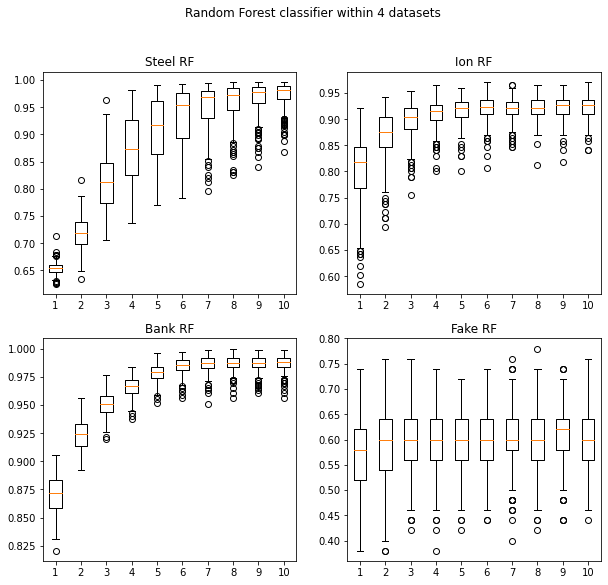

In [162]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Random Forest classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_RF)
axs[0, 0].set_title('Steel RF')
axs[0, 1].boxplot(ION_RF)
axs[0, 1].set_title('Ion RF')
axs[1, 0].boxplot(BANK_RF)
axs[1, 0].set_title('Bank RF')
axs[1, 1].boxplot(FAKE_RF)
axs[1, 1].set_title('Fake RF')

plt.show()

# 7th classifier (MLPClassifier) on 4 datasets

In [127]:
from sklearn.neural_network import MLPClassifier

#Empty list for boxplot
boxlist_MLP1 = []
boxlist_MLP2 = []
boxlist_MLP3 = []
boxlist_MLP4 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        mlp1 = MLPClassifier(alpha = 1e-5).fit(X_train,y_train)
        mlpscore1 = mlp1.score(X_test, y_test)
        boxlist_MLP1.append(mlpscore1)
        print("Split No.{} appended {} to mlp1!".format(j, mlpscore1))
        
        mlp2 = MLPClassifier(alpha = 1e-3).fit(X_train,y_train)
        mlpscore2 = mlp2.score(X_test, y_test)
        boxlist_MLP2.append(mlpscore2)
        print("Split No.{} appended {} to mlp2!".format(j, mlpscore2))
    
        mlp3 = MLPClassifier(alpha = 0.1).fit(X_train,y_train)
        mlpscore3 = mlp3.score(X_test, y_test)
        boxlist_MLP3.append(mlpscore3)
        print("Split No.{} appended {} to mlp3!".format(j, mlpscore3))
    
        mlp4 = MLPClassifier(alpha = 10.0).fit(X_train,y_train)
        mlpscore4 = mlp4.score(X_test, y_test)
        boxlist_MLP4.append(mlpscore4)
        print("Split No.{} appended {} to mlp4!".format(j, mlpscore4))
    
    count+=1
        
        

i'm on dataset 1!

Split No.0 appended 0.9969104016477858 to mlp1!
Split No.0 appended 0.9969104016477858 to mlp2!
Split No.0 appended 0.9989701338825953 to mlp3!
Split No.0 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.1 appended 1.0 to mlp1!
Split No.1 appended 0.9989701338825953 to mlp2!
Split No.1 appended 0.9989701338825953 to mlp3!
Split No.1 appended 0.9979402677651905 to mlp4!
i'm on dataset 1!

Split No.2 appended 0.9989701338825953 to mlp1!
Split No.2 appended 0.9989701338825953 to mlp2!
Split No.2 appended 0.9989701338825953 to mlp3!
Split No.2 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.3 appended 0.9979402677651905 to mlp1!
Split No.3 appended 0.9989701338825953 to mlp2!
Split No.3 appended 0.9979402677651905 to mlp3!
Split No.3 appended 0.9979402677651905 to mlp4!
i'm on dataset 1!

Split No.4 appended 0.9989701338825953 to mlp1!
Split No.4 appended 0.9979402677651905 to mlp2!
Split No.4 appended 0.9979402677651905 to mlp3!
Split No

C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Split No.22 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.23 appended 0.9969104016477858 to mlp1!
Split No.23 appended 0.9969104016477858 to mlp2!
Split No.23 appended 0.9969104016477858 to mlp3!
Split No.23 appended 1.0 to mlp4!
i'm on dataset 1!

Split No.24 appended 0.9979402677651905 to mlp1!
Split No.24 appended 0.9979402677651905 to mlp2!
Split No.24 appended 1.0 to mlp3!
Split No.24 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.25 appended 0.9989701338825953 to mlp1!
Split No.25 appended 0.9989701338825953 to mlp2!
Split No.25 appended 0.9989701338825953 to mlp3!
Split No.25 appended 0.9979402677651905 to mlp4!
i'm on dataset 1!

Split No.26 appended 0.9989701338825953 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Split No.26 appended 0.995880535530381 to mlp2!
Split No.26 appended 0.9989701338825953 to mlp3!
Split No.26 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.27 appended 0.9989701338825953 to mlp1!
Split No.27 appended 0.9989701338825953 to mlp2!
Split No.27 appended 0.9989701338825953 to mlp3!
Split No.27 appended 0.9979402677651905 to mlp4!
i'm on dataset 1!

Split No.28 appended 0.9989701338825953 to mlp1!
Split No.28 appended 0.9989701338825953 to mlp2!
Split No.28 appended 0.9989701338825953 to mlp3!
Split No.28 appended 0.9989701338825953 to mlp4!
i'm on dataset 1!

Split No.29 appended 0.9979402677651905 to mlp1!
Split No.29 appended 0.9979402677651905 to mlp2!
Split No.29 appended 0.9979402677651905 to mlp3!
Split No.29 appended 1.0 to mlp4!
i'm on dataset 1!

Split No.30 appended 0.9948506694129763 to mlp1!
Split No.30 appended 0.9969104016477858 to mlp2!
Split No.30 appended 0.9969104016477858 to mlp3!
Split No.30 appended 1.0 to mlp4!
i'm on dataset 1!

Split

C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9375 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9261363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.8579545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.8579545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.8465909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 0.9204545454545454 to mlp2!
Split No.10 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.9261363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 0.9318181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.8522727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.8352272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.8465909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.8579545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 0.9261363636363636 to mlp1!
Split No.28 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.9375 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.9375 to mlp2!
Split No.29 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.9204545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 0.8522727272727273 to mlp2!
Split No.34 appended 0.8579545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 0.8806818181818182 to mlp1!
Split No.44 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.8693181818181818 to mlp2!
Split No.47 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 0.9034090909090909 to mlp3!
Split No.48 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 0.8863636363636364 to mlp2!
Split No.49 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.8465909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.8465909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.8522727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.8579545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 0.8295454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 0.8295454545454546 to mlp2!
Split No.55 appended 0.8352272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 0.8181818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9431818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9488636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9545454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9431818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9545454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9318181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.8806818181818182 to mlp1!
Split No.69 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 0.9375 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.8579545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.8295454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.8920454545454546 to mlp3!
Split No.80 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.9318181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.9431818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9204545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 0.8352272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 0.8579545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.8636363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.8579545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 0.9318181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.8977272727272727 to mlp2!
Split No.117 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!

Split No.119 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.123 appended 0.9375 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.123 appended 0.9375 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.123 appended 0.9431818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.123 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.8579545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 0.9090909090909091 to mlp2!
Split No.129 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 0.9034090909090909 to mlp2!
Split No.130 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 0.9375 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 0.9545454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 0.9488636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.8522727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.8522727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.8409090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.8579545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 0.8465909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 0.8522727272727273 to mlp3!
Split No.148 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.8522727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 0.8806818181818182 to mlp3!
Split No.152 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.9034090909090909 to mlp1!
Split No.154 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9488636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9375 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9375 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9431818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9318181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 0.875 to mlp1!
Split No.164 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 0.8522727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9375 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9375 to mlp3!
Split No.171 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.8636363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 0.9375 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.8522727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 0.8977272727272727 to mlp2!
Split No.181 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 0.8409090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 0.8465909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.8522727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.8636363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 0.8465909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 0.8295454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.8636363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 0.8465909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9318181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 0.9318181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 0.9318181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 0.9375 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.9431818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.9261363636363636 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.9204545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.8920454545454546 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.8977272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 0.9090909090909091 to mlp1!
Split No.224 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.875 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.8522727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.8579545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.8409090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.9147727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 0.9204545454545454 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 0.9431818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 0.8977272727272727 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 0.9147727272727273 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.8636363636363636 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.8920454545454546 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.875 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.8693181818181818 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.8352272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9090909090909091 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9090909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 0.8920454545454546 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.8693181818181818 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.8806818181818182 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.8579545454545454 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.8863636363636364 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.8977272727272727 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.9090909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.8977272727272727 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.9034090909090909 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9261363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.9147727272727273 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.9034090909090909 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 0.8806818181818182 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 0.8806818181818182 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 0.8806818181818182 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.8636363636363636 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.8693181818181818 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.875 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.8352272727272727 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.9034090909090909 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.9034090909090909 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.9204545454545454 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.9090909090909091 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 0.8636363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 0.8863636363636364 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.8863636363636364 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.8920454545454546 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.8863636363636364 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.875 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.8522727272727273 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.8465909090909091 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.8465909090909091 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.8693181818181818 to mlp4!
i'm on dataset 2!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 0.9204545454545454 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 0.9261363636363636 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 0.9147727272727273 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 0.9204545454545454 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.9883381924198251 to mlp2!
Split No.0 appended 0.9941690962099126 to mlp3!
Split No.0 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.9956268221574344 to mlp3!
Split No.1 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.9912536443148688 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 1.0 to mlp3!
Split No.2 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.9970845481049563 to mlp3!
Split No.3 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.9985422740524781 to mlp3!
Split No.4 appended 0.9533527696793003 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 1.0 to mlp2!
Split No.5 appended 1.0 to mlp3!
Split No.5 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.9956268221574344 to mlp3!
Split No.6 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.9970845481049563 to mlp2!
Split No.7 appended 0.9970845481049563 to mlp3!
Split No.7 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.9912536443148688 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.9956268221574344 to mlp3!
Split No.8 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.9941690962099126 to mlp2!
Split No.9 appended 1.0 to mlp3!
Split No.9 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 1.0 to mlp3!
Split No.10 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.9854227405247813 to mlp3!
Split No.11 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.9941690962099126 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.9941690962099126 to mlp3!
Split No.12 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.9985422740524781 to mlp3!
Split No.13 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 1.0 to mlp3!
Split No.14 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.9985422740524781 to mlp3!
Split No.15 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 1.0 to mlp3!
Split No.16 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.9970845481049563 to mlp2!
Split No.17 appended 0.9970845481049563 to mlp3!
Split No.17 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 1.0 to mlp3!
Split No.18 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 1.0 to mlp3!
Split No.19 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 1.0 to mlp2!
Split No.20 appended 1.0 to mlp3!
Split No.20 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.9941690962099126 to mlp3!
Split No.21 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 1.0 to mlp2!
Split No.22 appended 1.0 to mlp3!
Split No.22 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!

Split No.23 appended 0.9708454810495627 to mlp1!
Split No.23 appended 0.9868804664723032 to mlp2!
Split No.23 appended 0.9708454810495627 to mlp3!
Split No.23 appended 0.9548104956268222 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 1.0 to mlp3!
Split No.24 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.9985422740524781 to mlp3!
Split No.25 appended 0.9795918367346939 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 1.0 to mlp3!
Split No.26 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.9897959183673469 to mlp2!
Split No.27 appended 0.9883381924198251 to mlp3!
Split No.27 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 1.0 to mlp2!
Split No.28 appended 1.0 to mlp3!
Split No.28 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 1.0 to mlp2!
Split No.29 appended 0.9956268221574344 to mlp3!
Split No.29 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.9941690962099126 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.9912536443148688 to mlp3!
Split No.30 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 1.0 to mlp2!
Split No.31 appended 0.9941690962099126 to mlp3!
Split No.31 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 1.0 to mlp3!
Split No.32 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.9985422740524781 to mlp3!
Split No.33 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 0.9956268221574344 to mlp3!
Split No.34 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.9985422740524781 to mlp2!
Split No.35 appended 0.9985422740524781 to mlp3!
Split No.35 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9941690962099126 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.9897959183673469 to mlp3!
Split No.36 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 1.0 to mlp3!
Split No.37 appended 0.9795918367346939 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 1.0 to mlp2!
Split No.38 appended 1.0 to mlp3!
Split No.38 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 1.0 to mlp2!
Split No.39 appended 1.0 to mlp3!
Split No.39 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 1.0 to mlp2!
Split No.40 appended 1.0 to mlp3!
Split No.40 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 1.0 to mlp2!
Split No.41 appended 1.0 to mlp3!
Split No.41 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 1.0 to mlp3!
Split No.42 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 1.0 to mlp2!
Split No.43 appended 1.0 to mlp3!
Split No.43 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 1.0 to mlp3!
Split No.44 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.9883381924198251 to mlp3!
Split No.45 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.9985422740524781 to mlp3!
Split No.46 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.9970845481049563 to mlp2!
Split No.47 appended 0.9970845481049563 to mlp3!
Split No.47 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 1.0 to mlp2!
Split No.48 appended 1.0 to mlp3!
Split No.48 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 1.0 to mlp3!
Split No.49 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.9970845481049563 to mlp3!
Split No.50 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.9897959183673469 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.9883381924198251 to mlp3!
Split No.51 appended 0.9533527696793003 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.9956268221574344 to mlp3!
Split No.52 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 1.0 to mlp3!
Split No.53 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 1.0 to mlp3!
Split No.54 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 0.9985422740524781 to mlp3!
Split No.55 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.9883381924198251 to mlp3!
Split No.56 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.9956268221574344 to mlp3!
Split No.57 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.9897959183673469 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.9897959183673469 to mlp3!
Split No.58 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.9956268221574344 to mlp3!
Split No.59 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 1.0 to mlp3!
Split No.60 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.61 appended 0.9897959183673469 to mlp2!
Split No.61 appended 0.9956268221574344 to mlp3!
Split No.61 appended 0.9533527696793003 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9795918367346939 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9795918367346939 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.9795918367346939 to mlp3!
Split No.62 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.9912536443148688 to mlp2!
Split No.63 appended 0.9912536443148688 to mlp3!
Split No.63 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.9970845481049563 to mlp2!
Split No.64 appended 0.9970845481049563 to mlp3!
Split No.64 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.9970845481049563 to mlp2!
Split No.65 appended 0.9912536443148688 to mlp3!
Split No.65 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 1.0 to mlp3!
Split No.66 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.9941690962099126 to mlp3!
Split No.67 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 1.0 to mlp3!
Split No.68 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.9970845481049563 to mlp3!
Split No.69 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.9956268221574344 to mlp3!
Split No.70 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 1.0 to mlp3!
Split No.71 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 1.0 to mlp3!
Split No.72 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.9970845481049563 to mlp3!
Split No.73 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.9970845481049563 to mlp3!
Split No.74 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 1.0 to mlp3!
Split No.75 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.9985422740524781 to mlp2!
Split No.76 appended 0.9985422740524781 to mlp3!
Split No.76 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.9970845481049563 to mlp3!
Split No.77 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.9941690962099126 to mlp2!
Split No.78 appended 0.9956268221574344 to mlp3!
Split No.78 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 1.0 to mlp3!
Split No.79 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.9868804664723032 to mlp2!
Split No.80 appended 0.9956268221574344 to mlp3!
Split No.80 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.9927113702623906 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.9897959183673469 to mlp3!
Split No.81 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.9956268221574344 to mlp3!
Split No.82 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.9985422740524781 to mlp3!
Split No.83 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 1.0 to mlp3!
Split No.84 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 1.0 to mlp3!
Split No.85 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.9883381924198251 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.9883381924198251 to mlp3!
Split No.86 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.9970845481049563 to mlp2!
Split No.87 appended 0.9985422740524781 to mlp3!
Split No.87 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 1.0 to mlp3!
Split No.88 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 1.0 to mlp3!
Split No.89 appended 0.9825072886297376 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 1.0 to mlp3!
Split No.90 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.9970845481049563 to mlp3!
Split No.91 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9868804664723032 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.9854227405247813 to mlp3!
Split No.92 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 1.0 to mlp3!
Split No.93 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 1.0 to mlp3!
Split No.94 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 1.0 to mlp3!
Split No.95 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.9985422740524781 to mlp3!
Split No.96 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.9897959183673469 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.9897959183673469 to mlp3!
Split No.97 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9868804664723032 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9897959183673469 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.9897959183673469 to mlp3!
Split No.98 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 1.0 to mlp3!
Split No.99 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.9912536443148688 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.9912536443148688 to mlp3!
Split No.100 appended 0.9795918367346939 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.9970845481049563 to mlp3!
Split No.101 appended 0.9810495626822158 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.9897959183673469 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.9897959183673469 to mlp2!
Split No.102 appended 0.9897959183673469 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.9927113702623906 to mlp2!
Split No.103 appended 0.9883381924198251 to mlp3!
Split No.103 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.9927113702623906 to mlp3!
Split No.104 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 1.0 to mlp3!
Split No.105 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 1.0 to mlp3!
Split No.106 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 1.0 to mlp3!
Split No.107 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 1.0 to mlp3!
Split No.108 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.9985422740524781 to mlp3!
Split No.109 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 1.0 to mlp3!
Split No.110 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.9985422740524781 to mlp3!
Split No.111 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 1.0 to mlp3!
Split No.112 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.9985422740524781 to mlp3!
Split No.113 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.9927113702623906 to mlp2!
Split No.114 appended 0.9927113702623906 to mlp3!
Split No.114 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 1.0 to mlp2!
Split No.115 appended 1.0 to mlp3!
Split No.115 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 1.0 to mlp3!
Split No.116 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.9897959183673469 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.9897959183673469 to mlp3!
Split No.117 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 1.0 to mlp2!
Split No.118 appended 1.0 to mlp3!
Split No.118 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 1.0 to mlp3!
Split No.119 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.9985422740524781 to mlp3!
Split No.120 appended 0.9810495626822158 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 1.0 to mlp3!
Split No.121 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 1.0 to mlp2!
Split No.122 appended 1.0 to mlp3!
Split No.122 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!

Split No.123 appended 0.9708454810495627 to mlp1!
Split No.123 appended 0.9708454810495627 to mlp2!
Split No.123 appended 0.9708454810495627 to mlp3!
Split No.123 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.9970845481049563 to mlp3!
Split No.124 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 1.0 to mlp3!
Split No.125 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.9956268221574344 to mlp2!
Split No.126 appended 0.9941690962099126 to mlp3!
Split No.126 appended 0.9533527696793003 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 1.0 to mlp3!
Split No.127 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 1.0 to mlp3!
Split No.128 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 1.0 to mlp3!
Split No.129 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 1.0 to mlp3!
Split No.130 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 1.0 to mlp3!
Split No.131 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 1.0 to mlp3!
Split No.132 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 1.0 to mlp3!
Split No.133 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.9941690962099126 to mlp2!
Split No.134 appended 0.9941690962099126 to mlp3!
Split No.134 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 1.0 to mlp3!
Split No.135 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.9970845481049563 to mlp2!
Split No.136 appended 0.9970845481049563 to mlp3!
Split No.136 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 1.0 to mlp3!
Split No.137 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 1.0 to mlp3!
Split No.138 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 1.0 to mlp2!
Split No.139 appended 0.9970845481049563 to mlp3!
Split No.139 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9825072886297376 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9839650145772595 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.9839650145772595 to mlp3!
Split No.140 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.9970845481049563 to mlp2!
Split No.141 appended 0.9956268221574344 to mlp3!
Split No.141 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 1.0 to mlp3!
Split No.142 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.9927113702623906 to mlp3!
Split No.143 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.9970845481049563 to mlp3!
Split No.144 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.978134110787172 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.9839650145772595 to mlp2!
Split No.145 appended 0.978134110787172 to mlp3!
Split No.145 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 1.0 to mlp3!
Split No.146 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.9941690962099126 to mlp3!
Split No.147 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 1.0 to mlp3!
Split No.148 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 1.0 to mlp3!
Split No.149 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 1.0 to mlp3!
Split No.150 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.9956268221574344 to mlp2!
Split No.151 appended 0.9956268221574344 to mlp3!
Split No.151 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 1.0 to mlp2!
Split No.152 appended 1.0 to mlp3!
Split No.152 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 1.0 to mlp2!
Split No.153 appended 1.0 to mlp3!
Split No.153 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.9839650145772595 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.9810495626822158 to mlp2!
Split No.154 appended 0.978134110787172 to mlp3!
Split No.154 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 1.0 to mlp3!
Split No.155 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 1.0 to mlp3!
Split No.156 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 1.0 to mlp3!
Split No.157 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 1.0 to mlp2!
Split No.158 appended 1.0 to mlp3!
Split No.158 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9825072886297376 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.9825072886297376 to mlp2!
Split No.159 appended 0.9752186588921283 to mlp3!
Split No.159 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.9985422740524781 to mlp3!
Split No.160 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 1.0 to mlp3!
Split No.161 appended 0.9810495626822158 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 1.0 to mlp2!
Split No.162 appended 1.0 to mlp3!
Split No.162 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.9970845481049563 to mlp2!
Split No.163 appended 0.9970845481049563 to mlp3!
Split No.163 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 1.0 to mlp3!
Split No.164 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.9912536443148688 to mlp3!
Split No.165 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 1.0 to mlp3!
Split No.166 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.9941690962099126 to mlp3!
Split No.167 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.9941690962099126 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.9897959183673469 to mlp3!
Split No.168 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 1.0 to mlp3!
Split No.169 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.9970845481049563 to mlp3!
Split No.170 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.9970845481049563 to mlp3!
Split No.171 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.9985422740524781 to mlp2!
Split No.172 appended 0.9985422740524781 to mlp3!
Split No.172 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.9985422740524781 to mlp3!
Split No.173 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 1.0 to mlp3!
Split No.174 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.9956268221574344 to mlp3!
Split No.175 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.9927113702623906 to mlp2!
Split No.176 appended 0.9927113702623906 to mlp3!
Split No.176 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 1.0 to mlp3!
Split No.177 appended 0.978134110787172 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.9956268221574344 to mlp3!
Split No.178 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.9970845481049563 to mlp3!
Split No.179 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.9912536443148688 to mlp3!
Split No.180 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 1.0 to mlp3!
Split No.181 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.9868804664723032 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.9868804664723032 to mlp2!
Split No.182 appended 0.9868804664723032 to mlp3!
Split No.182 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 1.0 to mlp2!
Split No.183 appended 1.0 to mlp3!
Split No.183 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.9912536443148688 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.9912536443148688 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.9825072886297376 to mlp3!
Split No.184 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 1.0 to mlp2!
Split No.185 appended 1.0 to mlp3!
Split No.185 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 1.0 to mlp3!
Split No.186 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.9927113702623906 to mlp2!
Split No.187 appended 0.9956268221574344 to mlp3!
Split No.187 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.9956268221574344 to mlp3!
Split No.188 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 1.0 to mlp2!
Split No.189 appended 1.0 to mlp3!
Split No.189 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 1.0 to mlp2!
Split No.190 appended 1.0 to mlp3!
Split No.190 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.9941690962099126 to mlp2!
Split No.191 appended 0.9941690962099126 to mlp3!
Split No.191 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.9970845481049563 to mlp2!
Split No.192 appended 0.9970845481049563 to mlp3!
Split No.192 appended 0.9416909620991254 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 1.0 to mlp3!
Split No.193 appended 0.9795918367346939 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 1.0 to mlp3!
Split No.194 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 1.0 to mlp3!
Split No.195 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.9970845481049563 to mlp3!
Split No.196 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.9927113702623906 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 1.0 to mlp3!
Split No.197 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 1.0 to mlp3!
Split No.198 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 1.0 to mlp3!
Split No.199 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.9956268221574344 to mlp3!
Split No.200 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.9970845481049563 to mlp3!
Split No.201 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 1.0 to mlp2!
Split No.202 appended 1.0 to mlp3!
Split No.202 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 1.0 to mlp2!
Split No.203 appended 1.0 to mlp3!
Split No.203 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.9912536443148688 to mlp2!
Split No.204 appended 0.9912536443148688 to mlp3!
Split No.204 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.9883381924198251 to mlp3!
Split No.205 appended 0.9795918367346939 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.9883381924198251 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.9839650145772595 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.9883381924198251 to mlp3!
Split No.206 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.9927113702623906 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.9927113702623906 to mlp3!
Split No.207 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 1.0 to mlp3!
Split No.208 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.9941690962099126 to mlp3!
Split No.209 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 1.0 to mlp3!
Split No.210 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.9970845481049563 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.9970845481049563 to mlp3!
Split No.211 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.9970845481049563 to mlp2!
Split No.212 appended 1.0 to mlp3!
Split No.212 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 1.0 to mlp3!
Split No.213 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 1.0 to mlp2!
Split No.214 appended 1.0 to mlp3!
Split No.214 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 1.0 to mlp2!
Split No.215 appended 1.0 to mlp3!
Split No.215 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.9927113702623906 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.9912536443148688 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.9912536443148688 to mlp3!
Split No.216 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 1.0 to mlp2!
Split No.217 appended 1.0 to mlp3!
Split No.217 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 1.0 to mlp3!
Split No.218 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.9941690962099126 to mlp3!
Split No.219 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 1.0 to mlp3!
Split No.220 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.9956268221574344 to mlp2!
Split No.221 appended 0.9956268221574344 to mlp3!
Split No.221 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.9956268221574344 to mlp3!
Split No.222 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.9941690962099126 to mlp3!
Split No.223 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 1.0 to mlp3!
Split No.224 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.9956268221574344 to mlp3!
Split No.225 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 1.0 to mlp2!
Split No.226 appended 1.0 to mlp3!
Split No.226 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 1.0 to mlp3!
Split No.227 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 1.0 to mlp1!
Split No.228 appended 0.9985422740524781 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 1.0 to mlp3!
Split No.228 appended 0.9766763848396501 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 1.0 to mlp2!
Split No.229 appended 1.0 to mlp3!
Split No.229 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 1.0 to mlp3!
Split No.230 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.9956268221574344 to mlp2!
Split No.231 appended 0.9956268221574344 to mlp3!
Split No.231 appended 0.9664723032069971 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.9970845481049563 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.9970845481049563 to mlp2!
Split No.232 appended 0.9970845481049563 to mlp3!
Split No.232 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.9941690962099126 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 1.0 to mlp2!
Split No.233 appended 0.9956268221574344 to mlp3!
Split No.233 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9912536443148688 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9912536443148688 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.9883381924198251 to mlp3!
Split No.234 appended 0.9577259475218659 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 1.0 to mlp3!
Split No.235 appended 0.9650145772594753 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 1.0 to mlp2!
Split No.236 appended 1.0 to mlp3!
Split No.236 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.9956268221574344 to mlp2!
Split No.237 appended 0.9956268221574344 to mlp3!
Split No.237 appended 0.9591836734693877 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.9985422740524781 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.9956268221574344 to mlp2!
Split No.238 appended 0.9941690962099126 to mlp3!
Split No.238 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 1.0 to mlp3!
Split No.239 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.9956268221574344 to mlp2!
Split No.240 appended 0.9956268221574344 to mlp3!
Split No.240 appended 0.9606413994169096 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.9956268221574344 to mlp3!
Split No.241 appended 0.9737609329446064 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 1.0 to mlp3!
Split No.242 appended 0.967930029154519 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 1.0 to mlp2!
Split No.243 appended 1.0 to mlp3!
Split No.243 appended 0.9693877551020408 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.9956268221574344 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.9956268221574344 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.9956268221574344 to mlp3!
Split No.244 appended 0.9723032069970845 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 1.0 to mlp3!
Split No.245 appended 0.9635568513119533 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 1.0 to mlp3!
Split No.246 appended 0.9752186588921283 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.9839650145772595 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.9810495626822158 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.978134110787172 to mlp3!
Split No.247 appended 0.9620991253644315 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 1.0 to mlp3!
Split No.248 appended 0.9708454810495627 to mlp4!
i'm on dataset 3!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 1.0 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 1.0 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.249 appended 1.0 to mlp3!
Split No.249 appended 0.9839650145772595 to mlp4!
i'm on dataset 4!

Split No.0 appended 0.62 to mlp1!
Split No.0 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.0 appended 0.62 to mlp3!
Split No.0 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.1 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.1 appended 0.52 to mlp2!
Split No.1 appended 0.46 to mlp3!
Split No.1 appended 0.5 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.64 to mlp1!
Split No.2 appended 0.56 to mlp2!
Split No.2 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.2 appended 0.42 to mlp4!
i'm on dataset 4!

Split No.3 appended 0.54 to mlp1!
Split No.3 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.3 appended 0.6 to mlp3!
Split No.3 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.4 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.4 appended 0.62 to mlp2!
Split No.4 appended 0.66 to mlp3!
Split No.4 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.64 to mlp1!
Split No.5 appended 0.62 to mlp2!
Split No.5 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.5 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.6 appended 0.6 to mlp1!
Split No.6 appended 0.68 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.6 appended 0.68 to mlp3!
Split No.6 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.7 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.7 appended 0.54 to mlp2!
Split No.7 appended 0.52 to mlp3!
Split No.7 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.58 to mlp1!
Split No.8 appended 0.54 to mlp2!
Split No.8 appended 0.56 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.8 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.9 appended 0.64 to mlp1!
Split No.9 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.9 appended 0.62 to mlp3!
Split No.9 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.10 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.10 appended 0.62 to mlp2!
Split No.10 appended 0.6 to mlp3!
Split No.10 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.48 to mlp1!
Split No.11 appended 0.52 to mlp2!
Split No.11 appended 0.5 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.11 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.12 appended 0.52 to mlp1!
Split No.12 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.12 appended 0.64 to mlp3!
Split No.12 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.13 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.13 appended 0.62 to mlp2!
Split No.13 appended 0.64 to mlp3!
Split No.13 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.64 to mlp1!
Split No.14 appended 0.56 to mlp2!
Split No.14 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.14 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.15 appended 0.76 to mlp1!
Split No.15 appended 0.74 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.15 appended 0.7 to mlp3!
Split No.15 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.16 appended 0.4 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.16 appended 0.38 to mlp2!
Split No.16 appended 0.36 to mlp3!
Split No.16 appended 0.36 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.6 to mlp1!
Split No.17 appended 0.6 to mlp2!
Split No.17 appended 0.52 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.17 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.18 appended 0.62 to mlp1!
Split No.18 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.18 appended 0.66 to mlp3!
Split No.18 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.19 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.19 appended 0.58 to mlp2!
Split No.19 appended 0.64 to mlp3!
Split No.19 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.6 to mlp1!
Split No.20 appended 0.66 to mlp2!
Split No.20 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.20 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.21 appended 0.52 to mlp1!
Split No.21 appended 0.54 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.21 appended 0.5 to mlp3!
Split No.21 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.22 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.22 appended 0.56 to mlp2!
Split No.22 appended 0.6 to mlp3!
Split No.22 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.62 to mlp1!
Split No.23 appended 0.62 to mlp2!
Split No.23 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.23 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.24 appended 0.56 to mlp1!
Split No.24 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.24 appended 0.58 to mlp3!
Split No.24 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.25 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.25 appended 0.58 to mlp2!
Split No.25 appended 0.6 to mlp3!
Split No.25 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.58 to mlp1!
Split No.26 appended 0.56 to mlp2!
Split No.26 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.26 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.27 appended 0.74 to mlp1!
Split No.27 appended 0.7 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.27 appended 0.76 to mlp3!
Split No.27 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.28 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.28 appended 0.54 to mlp2!
Split No.28 appended 0.56 to mlp3!
Split No.28 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.7 to mlp1!
Split No.29 appended 0.6 to mlp2!
Split No.29 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.29 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.30 appended 0.66 to mlp1!
Split No.30 appended 0.68 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.30 appended 0.68 to mlp3!
Split No.30 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.31 appended 0.7 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.31 appended 0.58 to mlp2!
Split No.31 appended 0.66 to mlp3!
Split No.31 appended 0.72 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.54 to mlp1!
Split No.32 appended 0.56 to mlp2!
Split No.32 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.32 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.33 appended 0.56 to mlp1!
Split No.33 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.33 appended 0.56 to mlp3!
Split No.33 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.34 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.34 appended 0.62 to mlp2!
Split No.34 appended 0.58 to mlp3!
Split No.34 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.58 to mlp1!
Split No.35 appended 0.54 to mlp2!
Split No.35 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.35 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.36 appended 0.56 to mlp1!
Split No.36 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.36 appended 0.64 to mlp3!
Split No.36 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.37 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.37 appended 0.52 to mlp2!
Split No.37 appended 0.5 to mlp3!
Split No.37 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.6 to mlp1!
Split No.38 appended 0.62 to mlp2!
Split No.38 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.38 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.39 appended 0.54 to mlp1!
Split No.39 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.39 appended 0.58 to mlp3!
Split No.39 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.40 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.40 appended 0.54 to mlp2!
Split No.40 appended 0.48 to mlp3!
Split No.40 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.6 to mlp1!
Split No.41 appended 0.58 to mlp2!
Split No.41 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.41 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.42 appended 0.52 to mlp1!
Split No.42 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.42 appended 0.54 to mlp3!
Split No.42 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.43 appended 0.64 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.43 appended 0.62 to mlp2!
Split No.43 appended 0.6 to mlp3!
Split No.43 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 0.56 to mlp1!
Split No.44 appended 0.56 to mlp2!
Split No.44 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.44 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.45 appended 0.56 to mlp1!
Split No.45 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.45 appended 0.52 to mlp3!
Split No.45 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.46 appended 0.72 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.46 appended 0.6 to mlp2!
Split No.46 appended 0.66 to mlp3!
Split No.46 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.64 to mlp1!
Split No.47 appended 0.6 to mlp2!
Split No.47 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.47 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.48 appended 0.66 to mlp1!
Split No.48 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.48 appended 0.62 to mlp3!
Split No.48 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.49 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.49 appended 0.52 to mlp2!
Split No.49 appended 0.6 to mlp3!
Split No.49 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.62 to mlp1!
Split No.50 appended 0.56 to mlp2!
Split No.50 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.50 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.51 appended 0.64 to mlp1!
Split No.51 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.51 appended 0.7 to mlp3!
Split No.51 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.52 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.52 appended 0.58 to mlp2!
Split No.52 appended 0.56 to mlp3!
Split No.52 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.66 to mlp1!
Split No.53 appended 0.64 to mlp2!
Split No.53 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.53 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.54 appended 0.68 to mlp1!
Split No.54 appended 0.7 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.54 appended 0.68 to mlp3!
Split No.54 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.55 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.55 appended 0.64 to mlp2!
Split No.55 appended 0.58 to mlp3!
Split No.55 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.62 to mlp1!
Split No.56 appended 0.58 to mlp2!
Split No.56 appended 0.72 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.56 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.57 appended 0.5 to mlp1!
Split No.57 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.57 appended 0.46 to mlp3!
Split No.57 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.58 appended 0.52 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.58 appended 0.5 to mlp2!
Split No.58 appended 0.54 to mlp3!
Split No.58 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.56 to mlp1!
Split No.59 appended 0.62 to mlp2!
Split No.59 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.59 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.60 appended 0.66 to mlp1!
Split No.60 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.60 appended 0.68 to mlp3!
Split No.60 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.61 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Split No.61 appended 0.6 to mlp2!
Split No.61 appended 0.66 to mlp3!
Split No.61 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.6 to mlp1!
Split No.62 appended 0.6 to mlp2!
Split No.62 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.62 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.63 appended 0.56 to mlp1!
Split No.63 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.63 appended 0.56 to mlp3!
Split No.63 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.64 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.64 appended 0.5 to mlp2!
Split No.64 appended 0.48 to mlp3!
Split No.64 appended 0.48 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.68 to mlp1!
Split No.65 appended 0.7 to mlp2!
Split No.65 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.65 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.66 appended 0.46 to mlp1!
Split No.66 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.66 appended 0.5 to mlp3!
Split No.66 appended 0.46 to mlp4!
i'm on dataset 4!

Split No.67 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.67 appended 0.62 to mlp2!
Split No.67 appended 0.66 to mlp3!
Split No.67 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.58 to mlp1!
Split No.68 appended 0.52 to mlp2!
Split No.68 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.68 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.69 appended 0.66 to mlp1!
Split No.69 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.69 appended 0.64 to mlp3!
Split No.69 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.70 appended 0.64 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.70 appended 0.66 to mlp2!
Split No.70 appended 0.6 to mlp3!
Split No.70 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.56 to mlp1!
Split No.71 appended 0.56 to mlp2!
Split No.71 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.71 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.72 appended 0.66 to mlp1!
Split No.72 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.72 appended 0.66 to mlp3!
Split No.72 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.73 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.73 appended 0.54 to mlp2!
Split No.73 appended 0.6 to mlp3!
Split No.73 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.52 to mlp1!
Split No.74 appended 0.56 to mlp2!
Split No.74 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.74 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.75 appended 0.62 to mlp1!
Split No.75 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.75 appended 0.64 to mlp3!
Split No.75 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.76 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.76 appended 0.6 to mlp2!
Split No.76 appended 0.6 to mlp3!
Split No.76 appended 0.68 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.66 to mlp1!
Split No.77 appended 0.68 to mlp2!
Split No.77 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.77 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.78 appended 0.56 to mlp1!
Split No.78 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.78 appended 0.58 to mlp3!
Split No.78 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.79 appended 0.48 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.79 appended 0.48 to mlp2!
Split No.79 appended 0.52 to mlp3!
Split No.79 appended 0.48 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.66 to mlp1!
Split No.80 appended 0.64 to mlp2!
Split No.80 appended 0.72 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.80 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.81 appended 0.46 to mlp1!
Split No.81 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.81 appended 0.5 to mlp3!
Split No.81 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.82 appended 0.5 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.82 appended 0.5 to mlp2!
Split No.82 appended 0.54 to mlp3!
Split No.82 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.7 to mlp1!
Split No.83 appended 0.72 to mlp2!
Split No.83 appended 0.7 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.83 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.84 appended 0.58 to mlp1!
Split No.84 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.84 appended 0.58 to mlp3!
Split No.84 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.85 appended 0.64 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.85 appended 0.58 to mlp2!
Split No.85 appended 0.62 to mlp3!
Split No.85 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.64 to mlp1!
Split No.86 appended 0.68 to mlp2!
Split No.86 appended 0.74 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.86 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.87 appended 0.52 to mlp1!
Split No.87 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.87 appended 0.52 to mlp3!
Split No.87 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.88 appended 0.68 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.88 appended 0.7 to mlp2!
Split No.88 appended 0.68 to mlp3!
Split No.88 appended 0.72 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.5 to mlp1!
Split No.89 appended 0.54 to mlp2!
Split No.89 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.89 appended 0.5 to mlp4!
i'm on dataset 4!

Split No.90 appended 0.56 to mlp1!
Split No.90 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.90 appended 0.62 to mlp3!
Split No.90 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.91 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.91 appended 0.56 to mlp2!
Split No.91 appended 0.58 to mlp3!
Split No.91 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.56 to mlp1!
Split No.92 appended 0.54 to mlp2!
Split No.92 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.92 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.93 appended 0.62 to mlp1!
Split No.93 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.93 appended 0.64 to mlp3!
Split No.93 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.94 appended 0.48 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.94 appended 0.54 to mlp2!
Split No.94 appended 0.6 to mlp3!
Split No.94 appended 0.48 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.64 to mlp1!
Split No.95 appended 0.64 to mlp2!
Split No.95 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.95 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.96 appended 0.64 to mlp1!
Split No.96 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.96 appended 0.66 to mlp3!
Split No.96 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.97 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.97 appended 0.6 to mlp2!
Split No.97 appended 0.5 to mlp3!
Split No.97 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.66 to mlp1!
Split No.98 appended 0.72 to mlp2!
Split No.98 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.98 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.99 appended 0.64 to mlp1!
Split No.99 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.99 appended 0.6 to mlp3!
Split No.99 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.100 appended 0.52 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.100 appended 0.54 to mlp2!
Split No.100 appended 0.54 to mlp3!
Split No.100 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.62 to mlp1!
Split No.101 appended 0.62 to mlp2!
Split No.101 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.101 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.102 appended 0.66 to mlp1!
Split No.102 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.102 appended 0.68 to mlp3!
Split No.102 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.103 appended 0.68 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.103 appended 0.68 to mlp2!
Split No.103 appended 0.64 to mlp3!
Split No.103 appended 0.68 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.48 to mlp1!
Split No.104 appended 0.62 to mlp2!
Split No.104 appended 0.48 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.104 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.105 appended 0.64 to mlp1!
Split No.105 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.105 appended 0.62 to mlp3!
Split No.105 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.106 appended 0.7 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.106 appended 0.7 to mlp2!
Split No.106 appended 0.68 to mlp3!
Split No.106 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.58 to mlp1!
Split No.107 appended 0.6 to mlp2!
Split No.107 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.107 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.108 appended 0.56 to mlp1!
Split No.108 appended 0.54 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.108 appended 0.56 to mlp3!
Split No.108 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.109 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.109 appended 0.54 to mlp2!
Split No.109 appended 0.56 to mlp3!
Split No.109 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.7 to mlp1!
Split No.110 appended 0.74 to mlp2!
Split No.110 appended 0.74 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.110 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.111 appended 0.5 to mlp1!
Split No.111 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.111 appended 0.5 to mlp3!
Split No.111 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.112 appended 0.66 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.112 appended 0.62 to mlp2!
Split No.112 appended 0.62 to mlp3!
Split No.112 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.58 to mlp1!
Split No.113 appended 0.5 to mlp2!
Split No.113 appended 0.52 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.113 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.114 appended 0.6 to mlp1!
Split No.114 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.114 appended 0.58 to mlp3!
Split No.114 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.115 appended 0.4 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.115 appended 0.36 to mlp2!
Split No.115 appended 0.38 to mlp3!
Split No.115 appended 0.42 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.66 to mlp1!
Split No.116 appended 0.62 to mlp2!
Split No.116 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.116 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.117 appended 0.54 to mlp1!
Split No.117 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.117 appended 0.58 to mlp3!
Split No.117 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.118 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.118 appended 0.56 to mlp2!
Split No.118 appended 0.56 to mlp3!
Split No.118 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 0.54 to mlp1!
Split No.119 appended 0.52 to mlp2!
Split No.119 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.119 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.120 appended 0.6 to mlp1!
Split No.120 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.120 appended 0.62 to mlp3!
Split No.120 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.121 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.121 appended 0.62 to mlp2!
Split No.121 appended 0.58 to mlp3!
Split No.121 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.6 to mlp1!
Split No.122 appended 0.7 to mlp2!
Split No.122 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.122 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.123 appended 0.58 to mlp1!
Split No.123 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.123 appended 0.56 to mlp3!
Split No.123 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.124 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.124 appended 0.64 to mlp2!
Split No.124 appended 0.62 to mlp3!
Split No.124 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.6 to mlp1!
Split No.125 appended 0.58 to mlp2!
Split No.125 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.125 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.126 appended 0.5 to mlp1!
Split No.126 appended 0.46 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.126 appended 0.48 to mlp3!
Split No.126 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.127 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.127 appended 0.58 to mlp2!
Split No.127 appended 0.6 to mlp3!
Split No.127 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.62 to mlp1!
Split No.128 appended 0.6 to mlp2!
Split No.128 appended 0.56 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.128 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.129 appended 0.68 to mlp1!
Split No.129 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.129 appended 0.68 to mlp3!
Split No.129 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.130 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.130 appended 0.62 to mlp2!
Split No.130 appended 0.58 to mlp3!
Split No.130 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.58 to mlp1!
Split No.131 appended 0.56 to mlp2!
Split No.131 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.131 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.132 appended 0.54 to mlp1!
Split No.132 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.132 appended 0.5 to mlp3!
Split No.132 appended 0.44 to mlp4!
i'm on dataset 4!

Split No.133 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.133 appended 0.54 to mlp2!
Split No.133 appended 0.58 to mlp3!
Split No.133 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.66 to mlp1!
Split No.134 appended 0.68 to mlp2!
Split No.134 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.134 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.135 appended 0.64 to mlp1!
Split No.135 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.135 appended 0.74 to mlp3!
Split No.135 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.136 appended 0.64 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.136 appended 0.68 to mlp2!
Split No.136 appended 0.66 to mlp3!
Split No.136 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.62 to mlp1!
Split No.137 appended 0.58 to mlp2!
Split No.137 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.137 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.138 appended 0.6 to mlp1!
Split No.138 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.138 appended 0.62 to mlp3!
Split No.138 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.139 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.139 appended 0.62 to mlp2!
Split No.139 appended 0.58 to mlp3!
Split No.139 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.66 to mlp1!
Split No.140 appended 0.66 to mlp2!
Split No.140 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.140 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.141 appended 0.64 to mlp1!
Split No.141 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.141 appended 0.62 to mlp3!
Split No.141 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.142 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.142 appended 0.54 to mlp2!
Split No.142 appended 0.54 to mlp3!
Split No.142 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.62 to mlp1!
Split No.143 appended 0.66 to mlp2!
Split No.143 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.143 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.144 appended 0.6 to mlp1!
Split No.144 appended 0.72 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.144 appended 0.66 to mlp3!
Split No.144 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.145 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.145 appended 0.66 to mlp2!
Split No.145 appended 0.54 to mlp3!
Split No.145 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.58 to mlp1!
Split No.146 appended 0.52 to mlp2!
Split No.146 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.146 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.147 appended 0.52 to mlp1!
Split No.147 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.147 appended 0.54 to mlp3!
Split No.147 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.148 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.148 appended 0.6 to mlp2!
Split No.148 appended 0.6 to mlp3!
Split No.148 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.62 to mlp1!
Split No.149 appended 0.44 to mlp2!
Split No.149 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.149 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.150 appended 0.6 to mlp1!
Split No.150 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.150 appended 0.66 to mlp3!
Split No.150 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.151 appended 0.7 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.151 appended 0.72 to mlp2!
Split No.151 appended 0.72 to mlp3!
Split No.151 appended 0.72 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 0.6 to mlp1!
Split No.152 appended 0.74 to mlp2!
Split No.152 appended 0.7 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.152 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.153 appended 0.48 to mlp1!
Split No.153 appended 0.46 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.153 appended 0.5 to mlp3!
Split No.153 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.154 appended 0.5 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.154 appended 0.48 to mlp2!
Split No.154 appended 0.52 to mlp3!
Split No.154 appended 0.56 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.66 to mlp1!
Split No.155 appended 0.64 to mlp2!
Split No.155 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.155 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.156 appended 0.58 to mlp1!
Split No.156 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.156 appended 0.56 to mlp3!
Split No.156 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.157 appended 0.7 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.157 appended 0.68 to mlp2!
Split No.157 appended 0.74 to mlp3!
Split No.157 appended 0.7 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.62 to mlp1!
Split No.158 appended 0.58 to mlp2!
Split No.158 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.158 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.159 appended 0.48 to mlp1!
Split No.159 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.159 appended 0.56 to mlp3!
Split No.159 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.160 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.160 appended 0.54 to mlp2!
Split No.160 appended 0.58 to mlp3!
Split No.160 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.56 to mlp1!
Split No.161 appended 0.58 to mlp2!
Split No.161 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.161 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.162 appended 0.56 to mlp1!
Split No.162 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.162 appended 0.58 to mlp3!
Split No.162 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.163 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.163 appended 0.56 to mlp2!
Split No.163 appended 0.62 to mlp3!
Split No.163 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 0.6 to mlp1!
Split No.164 appended 0.56 to mlp2!
Split No.164 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.164 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.165 appended 0.52 to mlp1!
Split No.165 appended 0.54 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.165 appended 0.48 to mlp3!
Split No.165 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.166 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.166 appended 0.62 to mlp2!
Split No.166 appended 0.66 to mlp3!
Split No.166 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.52 to mlp1!
Split No.167 appended 0.6 to mlp2!
Split No.167 appended 0.56 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.167 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.168 appended 0.58 to mlp1!
Split No.168 appended 0.54 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.168 appended 0.54 to mlp3!
Split No.168 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.169 appended 0.4 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.169 appended 0.48 to mlp2!
Split No.169 appended 0.54 to mlp3!
Split No.169 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.64 to mlp1!
Split No.170 appended 0.62 to mlp2!
Split No.170 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.170 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.171 appended 0.56 to mlp1!
Split No.171 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.171 appended 0.56 to mlp3!
Split No.171 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.172 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.172 appended 0.6 to mlp2!
Split No.172 appended 0.62 to mlp3!
Split No.172 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.66 to mlp1!
Split No.173 appended 0.72 to mlp2!
Split No.173 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.173 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.174 appended 0.52 to mlp1!
Split No.174 appended 0.48 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.174 appended 0.52 to mlp3!
Split No.174 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.175 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.175 appended 0.5 to mlp2!
Split No.175 appended 0.54 to mlp3!
Split No.175 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.52 to mlp1!
Split No.176 appended 0.52 to mlp2!
Split No.176 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.176 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.177 appended 0.56 to mlp1!
Split No.177 appended 0.5 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.177 appended 0.56 to mlp3!
Split No.177 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.178 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.178 appended 0.64 to mlp2!
Split No.178 appended 0.58 to mlp3!
Split No.178 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.52 to mlp1!
Split No.179 appended 0.54 to mlp2!
Split No.179 appended 0.44 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.179 appended 0.48 to mlp4!
i'm on dataset 4!

Split No.180 appended 0.56 to mlp1!
Split No.180 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.180 appended 0.58 to mlp3!
Split No.180 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.181 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.181 appended 0.62 to mlp2!
Split No.181 appended 0.58 to mlp3!
Split No.181 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.5 to mlp1!
Split No.182 appended 0.56 to mlp2!
Split No.182 appended 0.56 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.182 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.183 appended 0.46 to mlp1!
Split No.183 appended 0.46 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.183 appended 0.54 to mlp3!
Split No.183 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.184 appended 0.52 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.184 appended 0.6 to mlp2!
Split No.184 appended 0.56 to mlp3!
Split No.184 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.52 to mlp1!
Split No.185 appended 0.46 to mlp2!
Split No.185 appended 0.52 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.185 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.186 appended 0.64 to mlp1!
Split No.186 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.186 appended 0.62 to mlp3!
Split No.186 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.187 appended 0.7 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.187 appended 0.64 to mlp2!
Split No.187 appended 0.66 to mlp3!
Split No.187 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.64 to mlp1!
Split No.188 appended 0.6 to mlp2!
Split No.188 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.188 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.189 appended 0.54 to mlp1!
Split No.189 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.189 appended 0.56 to mlp3!
Split No.189 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.190 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.190 appended 0.52 to mlp2!
Split No.190 appended 0.58 to mlp3!
Split No.190 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.6 to mlp1!
Split No.191 appended 0.6 to mlp2!
Split No.191 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.191 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.192 appended 0.58 to mlp1!
Split No.192 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.192 appended 0.68 to mlp3!
Split No.192 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.193 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.193 appended 0.56 to mlp2!
Split No.193 appended 0.56 to mlp3!
Split No.193 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.58 to mlp1!
Split No.194 appended 0.54 to mlp2!
Split No.194 appended 0.62 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.194 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.195 appended 0.54 to mlp1!
Split No.195 appended 0.56 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.195 appended 0.54 to mlp3!
Split No.195 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.196 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.196 appended 0.64 to mlp2!
Split No.196 appended 0.64 to mlp3!
Split No.196 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.52 to mlp1!
Split No.197 appended 0.52 to mlp2!
Split No.197 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.197 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.198 appended 0.54 to mlp1!
Split No.198 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.198 appended 0.56 to mlp3!
Split No.198 appended 0.5 to mlp4!
i'm on dataset 4!

Split No.199 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.199 appended 0.56 to mlp2!
Split No.199 appended 0.62 to mlp3!
Split No.199 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.64 to mlp1!
Split No.200 appended 0.64 to mlp2!
Split No.200 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.200 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.201 appended 0.52 to mlp1!
Split No.201 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.201 appended 0.5 to mlp3!
Split No.201 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.202 appended 0.62 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.202 appended 0.58 to mlp2!
Split No.202 appended 0.66 to mlp3!
Split No.202 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.64 to mlp1!
Split No.203 appended 0.64 to mlp2!
Split No.203 appended 0.66 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.203 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.204 appended 0.42 to mlp1!
Split No.204 appended 0.46 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.204 appended 0.48 to mlp3!
Split No.204 appended 0.42 to mlp4!
i'm on dataset 4!

Split No.205 appended 0.6 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.205 appended 0.58 to mlp2!
Split No.205 appended 0.62 to mlp3!
Split No.205 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.66 to mlp1!
Split No.206 appended 0.66 to mlp2!
Split No.206 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.206 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.207 appended 0.46 to mlp1!
Split No.207 appended 0.48 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.207 appended 0.56 to mlp3!
Split No.207 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.208 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.208 appended 0.56 to mlp2!
Split No.208 appended 0.64 to mlp3!
Split No.208 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.62 to mlp1!
Split No.209 appended 0.66 to mlp2!
Split No.209 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.209 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.210 appended 0.7 to mlp1!
Split No.210 appended 0.62 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.210 appended 0.7 to mlp3!
Split No.210 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.211 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.211 appended 0.58 to mlp2!
Split No.211 appended 0.6 to mlp3!
Split No.211 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.6 to mlp1!
Split No.212 appended 0.68 to mlp2!
Split No.212 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.212 appended 0.58 to mlp4!
i'm on dataset 4!

Split No.213 appended 0.64 to mlp1!
Split No.213 appended 0.66 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.213 appended 0.62 to mlp3!
Split No.213 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.214 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.214 appended 0.54 to mlp2!
Split No.214 appended 0.56 to mlp3!
Split No.214 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.56 to mlp1!
Split No.215 appended 0.56 to mlp2!
Split No.215 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.215 appended 0.54 to mlp4!
i'm on dataset 4!

Split No.216 appended 0.48 to mlp1!
Split No.216 appended 0.48 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.216 appended 0.52 to mlp3!
Split No.216 appended 0.52 to mlp4!
i'm on dataset 4!

Split No.217 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.217 appended 0.52 to mlp2!
Split No.217 appended 0.56 to mlp3!
Split No.217 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.56 to mlp1!
Split No.218 appended 0.64 to mlp2!
Split No.218 appended 0.56 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.218 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.219 appended 0.68 to mlp1!
Split No.219 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.219 appended 0.7 to mlp3!
Split No.219 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.220 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.220 appended 0.58 to mlp2!
Split No.220 appended 0.58 to mlp3!
Split No.220 appended 0.62 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.7 to mlp1!
Split No.221 appended 0.72 to mlp2!
Split No.221 appended 0.7 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.221 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.222 appended 0.56 to mlp1!
Split No.222 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.222 appended 0.54 to mlp3!
Split No.222 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.223 appended 0.54 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.223 appended 0.62 to mlp2!
Split No.223 appended 0.64 to mlp3!
Split No.223 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 0.66 to mlp1!
Split No.224 appended 0.58 to mlp2!
Split No.224 appended 0.54 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.224 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.225 appended 0.66 to mlp1!
Split No.225 appended 0.68 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.225 appended 0.6 to mlp3!
Split No.225 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.226 appended 0.66 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.226 appended 0.72 to mlp2!
Split No.226 appended 0.76 to mlp3!
Split No.226 appended 0.68 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.64 to mlp1!
Split No.227 appended 0.58 to mlp2!
Split No.227 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.227 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.228 appended 0.6 to mlp1!
Split No.228 appended 0.58 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.228 appended 0.6 to mlp3!
Split No.228 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.229 appended 0.68 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.229 appended 0.66 to mlp2!
Split No.229 appended 0.68 to mlp3!
Split No.229 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.56 to mlp1!
Split No.230 appended 0.52 to mlp2!
Split No.230 appended 0.6 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.230 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.231 appended 0.68 to mlp1!
Split No.231 appended 0.64 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.231 appended 0.7 to mlp3!
Split No.231 appended 0.72 to mlp4!
i'm on dataset 4!

Split No.232 appended 0.52 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.232 appended 0.56 to mlp2!
Split No.232 appended 0.5 to mlp3!
Split No.232 appended 0.66 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.52 to mlp1!
Split No.233 appended 0.52 to mlp2!
Split No.233 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.233 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.234 appended 0.72 to mlp1!
Split No.234 appended 0.68 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.234 appended 0.68 to mlp3!
Split No.234 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.235 appended 0.5 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.235 appended 0.48 to mlp2!
Split No.235 appended 0.56 to mlp3!
Split No.235 appended 0.58 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.6 to mlp1!
Split No.236 appended 0.5 to mlp2!
Split No.236 appended 0.52 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.236 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.237 appended 0.62 to mlp1!
Split No.237 appended 0.7 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.237 appended 0.66 to mlp3!
Split No.237 appended 0.68 to mlp4!
i'm on dataset 4!

Split No.238 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.238 appended 0.64 to mlp2!
Split No.238 appended 0.64 to mlp3!
Split No.238 appended 0.52 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.6 to mlp1!
Split No.239 appended 0.6 to mlp2!
Split No.239 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.239 appended 0.66 to mlp4!
i'm on dataset 4!

Split No.240 appended 0.66 to mlp1!
Split No.240 appended 0.6 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.240 appended 0.66 to mlp3!
Split No.240 appended 0.7 to mlp4!
i'm on dataset 4!

Split No.241 appended 0.66 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.241 appended 0.58 to mlp2!
Split No.241 appended 0.62 to mlp3!
Split No.241 appended 0.64 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.6 to mlp1!
Split No.242 appended 0.64 to mlp2!
Split No.242 appended 0.58 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.242 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.243 appended 0.66 to mlp1!
Split No.243 appended 0.7 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.243 appended 0.66 to mlp3!
Split No.243 appended 0.62 to mlp4!
i'm on dataset 4!

Split No.244 appended 0.58 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.244 appended 0.58 to mlp2!
Split No.244 appended 0.6 to mlp3!
Split No.244 appended 0.6 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.66 to mlp1!
Split No.245 appended 0.6 to mlp2!
Split No.245 appended 0.68 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.245 appended 0.64 to mlp4!
i'm on dataset 4!

Split No.246 appended 0.54 to mlp1!
Split No.246 appended 0.52 to mlp2!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.246 appended 0.56 to mlp3!
Split No.246 appended 0.56 to mlp4!
i'm on dataset 4!

Split No.247 appended 0.56 to mlp1!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.247 appended 0.56 to mlp2!
Split No.247 appended 0.5 to mlp3!
Split No.247 appended 0.54 to mlp4!
i'm on dataset 4!



C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.64 to mlp1!
Split No.248 appended 0.62 to mlp2!
Split No.248 appended 0.64 to mlp3!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Split No.248 appended 0.6 to mlp4!
i'm on dataset 4!

Split No.249 appended 0.64 to mlp1!
Split No.249 appended 0.58 to mlp2!
Split No.249 appended 0.54 to mlp3!
Split No.249 appended 0.58 to mlp4!


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Validation Errors MLP 

In [128]:
steel_mlp1 = boxlist_MLP1[0:250]
steel_mlp2 = boxlist_MLP2[0:250]
steel_mlp3 = boxlist_MLP3[0:250]
steel_mlp4 = boxlist_MLP4[0:250]


ion_mlp1 = boxlist_MLP1[250:500]
ion_mlp2 = boxlist_MLP2[250:500]
ion_mlp3 = boxlist_MLP3[250:500]
ion_mlp4 = boxlist_MLP4[250:500]


bank_mlp1 = boxlist_MLP1[500:750]
bank_mlp2 = boxlist_MLP2[500:750]
bank_mlp3 = boxlist_MLP3[500:750]
bank_mlp4 = boxlist_MLP4[500:750]

fake_mlp1 = boxlist_MLP1[750:1000]
fake_mlp2 = boxlist_MLP2[750:1000]
fake_mlp3 = boxlist_MLP3[750:1000]
fake_mlp4 = boxlist_MLP4[750:1000]

In [129]:
print(1-np.mean(steel_mlp1))
print(1-np.mean(steel_mlp2))
print(1-np.mean(steel_mlp3))
print(1-np.mean(steel_mlp4))

VAL_MLP_STEEL = min(1-np.mean(steel_mlp1),1-np.mean(steel_mlp2),1-np.mean(steel_mlp3),1-np.mean(steel_mlp4))  
print(VAL_MLP_STEEL)

0.001544799176107059
0.0014994850669413085
0.0011410916580844033
0.0011781668383109567
0.0011410916580844033


In [130]:
print(1-np.mean(ion_mlp1))
print(1-np.mean(ion_mlp2))
print(1-np.mean(ion_mlp3))
print(1-np.mean(ion_mlp4))

VAL_MLP_ION = min(1-np.mean(ion_mlp1),1-np.mean(ion_mlp2),1-np.mean(ion_mlp3),1-np.mean(ion_mlp4))  
print(VAL_MLP_ION)

0.10415909090909103
0.10413636363636358
0.10390909090909095
0.11754545454545462
0.10390909090909095


In [131]:
print(1-np.mean(bank_mlp1))
print(1-np.mean(bank_mlp2))
print(1-np.mean(bank_mlp3))
print(1-np.mean(bank_mlp4))

VAL_MLP_BANK = min(1-np.mean(bank_mlp1),1-np.mean(bank_mlp2),1-np.mean(bank_mlp3),1-np.mean(bank_mlp4))  
print(VAL_MLP_BANK)

0.0025189504373177574
0.002676384839650159
0.0033877551020407015
0.031288629737609264
0.0025189504373177574


In [132]:
print(1-np.mean(fake_mlp1))
print(1-np.mean(fake_mlp2))
print(1-np.mean(fake_mlp3))
print(1-np.mean(fake_mlp4))

VAL_MLP_FAKE = min(1-np.mean(fake_mlp1),1-np.mean(fake_mlp2),1-np.mean(fake_mlp3),1-np.mean(fake_mlp4))  
print(VAL_MLP_FAKE)

0.40976
0.4112
0.40103999999999995
0.39896
0.39896


# Boxplot for MLP classifier

In [139]:
boxlist_MLP1 = pd.DataFrame(boxlist_MLP1)
boxlist_MLP2 = pd.DataFrame(boxlist_MLP2)
boxlist_MLP3 = pd.DataFrame(boxlist_MLP3)
boxlist_MLP4 = pd.DataFrame(boxlist_MLP4)

In [140]:
steel_mlp1 = boxlist_MLP1[0:250]
steel_mlp2 = boxlist_MLP2[0:250]
steel_mlp3 = boxlist_MLP3[0:250]
steel_mlp4 = boxlist_MLP4[0:250]


ion_mlp1 = boxlist_MLP1[250:500]
ion_mlp2 = boxlist_MLP2[250:500]
ion_mlp3 = boxlist_MLP3[250:500]
ion_mlp4 = boxlist_MLP4[250:500]


bank_mlp1 = boxlist_MLP1[500:750]
bank_mlp2 = boxlist_MLP2[500:750]
bank_mlp3 = boxlist_MLP3[500:750]
bank_mlp4 = boxlist_MLP4[500:750]

fake_mlp1 = boxlist_MLP1[750:1000]
fake_mlp2 = boxlist_MLP2[750:1000]
fake_mlp3 = boxlist_MLP3[750:1000]
fake_mlp4 = boxlist_MLP4[750:1000]


#Code for boxplots.
steel_mlp1 = pd.DataFrame(steel_mlp1)
steel_mlp2 = pd.DataFrame(steel_mlp2)
steel_mlp3 = pd.DataFrame(steel_mlp3)
steel_mlp4 = pd.DataFrame(steel_mlp4)

ion_mlp1 = pd.DataFrame(ion_mlp1)
ion_mlp2 = pd.DataFrame(ion_mlp2)
ion_mlp3 = pd.DataFrame(ion_mlp3)
ion_mlp4 = pd.DataFrame(ion_mlp4)

bank_mlp1 = pd.DataFrame(bank_mlp1)
bank_mlp2 = pd.DataFrame(bank_mlp2)
bank_mlp3 = pd.DataFrame(bank_mlp3)
bank_mlp4 = pd.DataFrame(bank_mlp4)

fake_mlp1 = pd.DataFrame(fake_mlp1)
fake_mlp2 = pd.DataFrame(fake_mlp2)
fake_mlp3 = pd.DataFrame(fake_mlp3)
fake_mlp4 = pd.DataFrame(fake_mlp4)

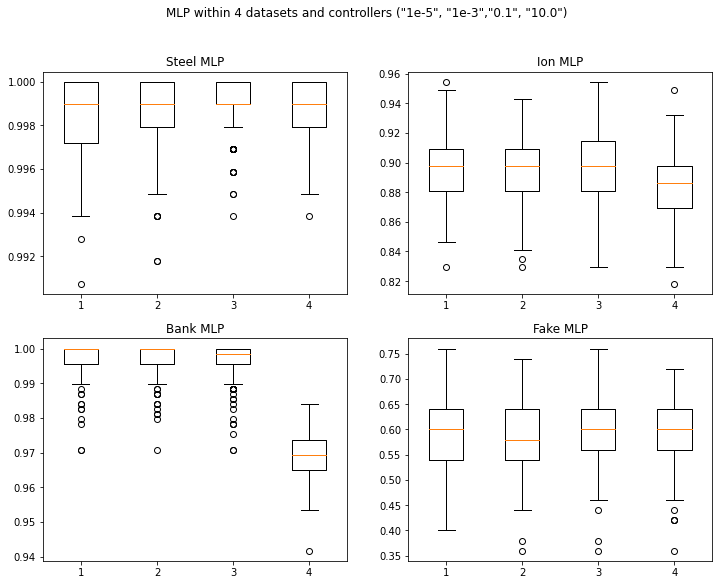

In [141]:

data1 = [steel_mlp1, steel_mlp2, steel_mlp3, steel_mlp4]
data2 = [ion_mlp1, ion_mlp2, ion_mlp3, ion_mlp4]
data3 = [bank_mlp1, bank_mlp2, bank_mlp3, bank_mlp4]
data4 = [fake_mlp1,fake_mlp2,fake_mlp3, fake_mlp4]

mlp_headers = ["1e-5", "1e-3","0.1", "10.0"]

STEEL_MLP = pd.concat(data1, axis=1, keys=mlp_headers)
ION_MLP = pd.concat(data2, axis=1, keys=mlp_headers)
BANK_MLP = pd.concat(data3, axis=1, keys=mlp_headers)
FAKE_MLP = pd.concat(data4, axis=1, keys=mlp_headers)

#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('MLP within 4 datasets and controllers ("1e-5", "1e-3","0.1", "10.0")')
axs[0, 0].boxplot(STEEL_MLP)
axs[0, 0].set_title('Steel MLP')
axs[0, 1].boxplot(ION_MLP)
axs[0, 1].set_title('Ion MLP')
axs[1, 0].boxplot(BANK_MLP)
axs[1, 0].set_title('Bank MLP')
axs[1, 1].boxplot(FAKE_MLP)
axs[1, 1].set_title('Fake MLP')

plt.show()


# Overall Summary

Write a paragraph summarising the overall results, as captured in these two tables.
Include two summary tables, with rows being models, and columns being datasets:
Table I is to contain the best average value (of validation error).
Table II is to contain the associated (ie. best) value for the control parameter.
If you notice something unexpected, point it out, explaining why you think it is worth mentioning.

KNN - There are no outstanding outliers. All the boxplots are generally similar, except for the bank and dataset. The average score for each knn(1-5) against the bank dataset is near 1. Which is extremely high score.

Gaussian - Steel and Ion stand out the most against the Gaussian classifier. Steel and Ion has extremely low score when paired with controller variables "1e-9", "1e-5". Although when the controller is 1e-1 Steel and ion is relatively high score. There are no considerable changes in the Bank and fake datasets across different gaussian control variables. There are alot of high value outliers for steel and ion at "1e-5".

Logistic Regression - Everything looks generally the same across all datasets. Except steel which is relatively averagely high across all controll variables. Bank and ion were all rounder high average scores that were consistent

Decision Tree - General trend that overall score increases as controller variable increases. Except fake dataset. Steel DT gives basically a score of 1.

Gradient Boosting - Steel gives 1 across all controller variables used. Although ion and bank dataset do better in the first 4 controller variables, but become less effective as the controller variable number increases.

Random Forest - apart from fake dataset, all datasets improved in score and accuracy the more controller variable number increased.

Mlp - Interesting boxplots were found in the steel and bank dataset, as their averages were close to perfect 1. ion and fake were generally normal and consistent.

## TABLE 1(validation) and TABLE 2(best controller variable) SUMMARY

Its expected that gradient booster and decision tree have a validation error of 0. As it could not be improved any further. Its also expected to see the Fake dataset have worse overall validation scores as it is a synthetically made dataset..

In [189]:
#Table 1 consists of Best Validation Errors.
compare_models = pd.DataFrame(
    {  'Classifier/Dataset' : ['KNN', 'GaussianNB','Logistic','Decision Tree','Gradient Boosting','Random Forest','MLP'],
       'Steel' : [VAL_KNN_STEEL,VAL_GAUSS_STEEL,VAL_LOG_STEEL,VAL_DT_STEEL,VAL_GB_STEEL,VAL_RF_STEEL,VAL_MLP_STEEL],
       'Ion' : [VAL_KNN_ION,VAL_GAUSS_ION,VAL_LOG_ION,VAL_DT_ION,VAL_GB_ION,VAL_RF_ION,VAL_MLP_ION],
       'Bank' : [VAL_KNN_BANK,VAL_GAUSS_BANK,VAL_LOG_BANK,VAL_DT_BANK,VAL_GB_BANK,VAL_RF_BANK,VAL_MLP_BANK],
       'Fake' : [VAL_KNN_FAKE,VAL_GAUSS_FAKE,VAL_LOG_FAKE,VAL_DT_FAKE,VAL_GB_FAKE,VAL_RF_FAKE,VAL_MLP_FAKE],

    })

print(compare_models)

  Classifier/Dataset     Steel       Ion      Bank     Fake
0                KNN  0.018381  0.123500  0.001534  0.47232
1         GaussianNB  0.011440  0.144091  0.158420  0.38640
2           Logistic  0.000465  0.130432  0.017557  0.36376
3      Decision Tree  0.000000  0.139000  0.027131  0.32256
4  Gradient Boosting  0.000000  0.102273  0.013819  0.37824
5      Random Forest  0.027118  0.078591  0.012974  0.39328
6                MLP  0.001141  0.103909  0.002519  0.39896


In [4]:
#Table 2 consists of Best Value of control parameters.
compare_models2 = pd.DataFrame(
    {  'Classifier' : ['KNN', 'GaussianNB','Logistic','Decision Tree','Gradient Boosting','Random Forest','MLP'],
       'Steel' : [1,1e-1,5.0,'>5','1-10',10,0.1],
       'Ion' : [2,1e-1,"0.5 or 5",7,3,10,0.1],
       'Bank' : [2,"1e-9 or 1e-5",5.0,9,3,9,1e-5],
       'Fake' : [5,'1e-9 or 1e-5',5.0,1,1,9,10.0],

    })
compare_models2

Classifier Steel       Ion          Bank          Fake
0                KNN     1         2             2             5
1         GaussianNB   0.1       0.1  1e-9 or 1e-5  1e-9 or 1e-5
2           Logistic     5  0.5 or 5             5             5
3      Decision Tree    >5         7             9             1
4  Gradient Boosting  1-10         3             3             1
5      Random Forest    10        10             9             9
6                MLP   0.1       0.1         1e-05            10

# Part 2: clustering, for semi-supervised learning

# Iris with and without cluster column

In [14]:
from sklearn.cluster import KMeans

iriscol = pd.read_csv("C:/Users/GGPC/Desktop/comp309/iris.csv")
noiriscol = pd.read_csv("C:/Users/GGPC/Desktop/comp309/iris.csv")

In [15]:
iriscol.head()

sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method, run on the whole dataset, and add the cluster label as a new column in X. Then,

In [16]:
from sklearn.naive_bayes import GaussianNB
#After 
#for at least a hundred repeats
#randomly split the iris dataset (as above)
#train GaussianNB() Classifiers on the training data
#without the cluster column
#with the cluster column
#find and store the test-set scores of (i) and (ii)

#Test scores, with column
coltest=[]

for i in range(100): 
    
    #Add the cluster column
    #use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method
    kmeans = KMeans(n_clusters=3)
    
    #Obtain the values for columns 1-4.exclude class column.
    kmeans.fit(iriscol.iloc[:, [0,1,2,3]].values)
    
    #add cluster column to iris, This will be the dataset used for The first 100 repeats.
    iriscol['cluster'] = kmeans.labels_
    
    train_set,test_set = train_test_split(iriscol, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
    
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    coltest.append(clfscore)
    

In [17]:
#Test scores, with column
nocoltest=[]

for i in range(100): 
    
    train_set,test_set = train_test_split(noiriscol, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
    
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    nocoltest.append(clfscore)
    

plot a scatterplot of the (i)-scores on x-axis against the (ii)-scores on the y-axis. So if the cluster label tends to help, there will be more points above the diagonal than below it.

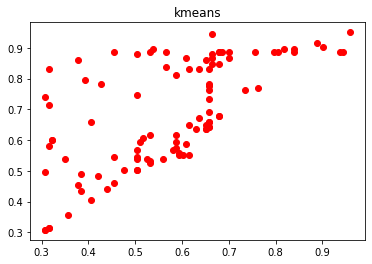

In [18]:
plt.scatter(nocoltest,coltest,c="r")
plt.title("kmeans")
plt.show()

# Bank with and without cluster column

In [102]:
bank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")
nobank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")

In [103]:
bank.shape

(1372, 5)

In [104]:
from sklearn.naive_bayes import GaussianNB
#After 
#for at least a hundred repeats
#randomly split the iris dataset (as above)
#train GaussianNB() Classifiers on the training data
#without the cluster column
#with the cluster column
#find and store the test-set scores of (i) and (ii)

#Test scores, with column
bankcoltest=[]

for i in range(100): 
    
    #Add the cluster column
    #use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method
    kmeans = KMeans(n_clusters=3)
    
    #Obtain the values for columns 1-4.exclude class column.
    kmeans.fit(bank.iloc[:, [0,1,2,3]].values)
    
    #add cluster column to iris, This will be the dataset used for The first 100 repeats.
    bank['cluster'] = kmeans.labels_
    
    train_set,test_set = train_test_split(bank, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    bankcoltest.append(clfscore)
    

In [105]:
#Test scores, with column
banknocoltest=[]

for i in range(100): 
    
    train_set,test_set = train_test_split(nobank, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    banknocoltest.append(clfscore)
    

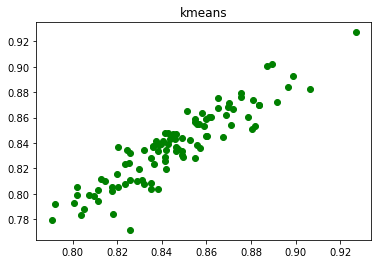

In [106]:
plt.scatter(banknocoltest,bankcoltest,c="g")
plt.title("kmeans")
plt.show()

# Summary for bank vs iris

"write a paragraph explaining whether they are the same or different, and why"

Visually the iris dataset has scatter plots above the diagonal line. 
While Bank is scattered along the line. The iris dataset has a small 150 amount of values compared to the bank dataset that consists of over 1000+ values. The cluster label tends to help, as there are more points above the diagonal than below it. For the iris data, it seems that the cluster label helped(red points). While it did not help in the bank dataset(Green points). In the bank dataset all the values are relatively the same, most likely because there is many many values. the difference is really apparent in small datasets.